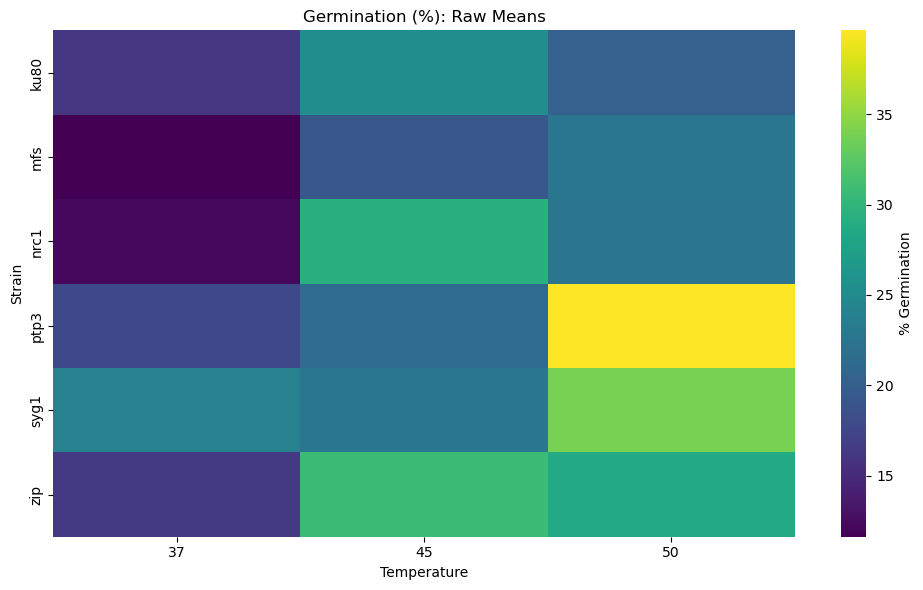

In [3]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/09_09_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()


### 09/18/2025

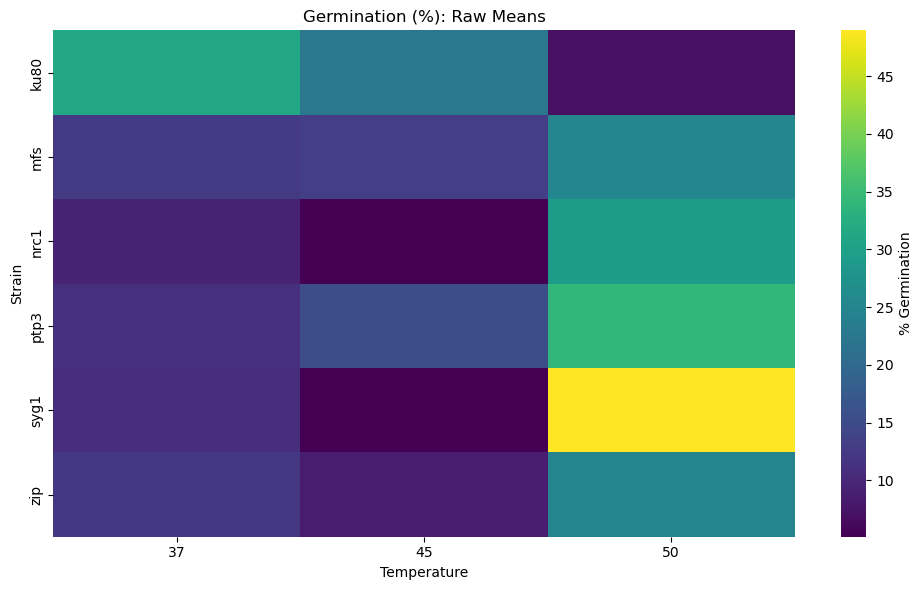

In [4]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/09_18_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()


### 09/24/2025

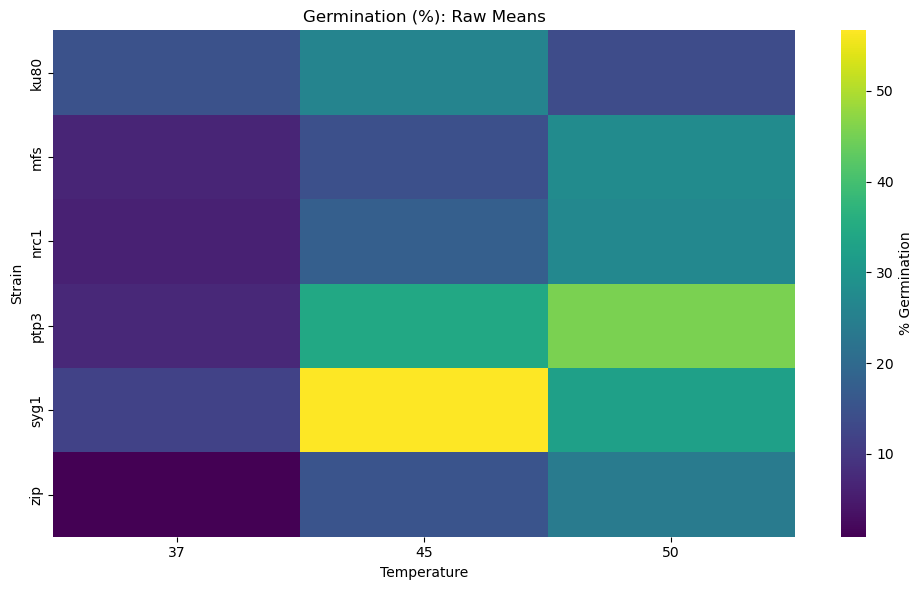

In [2]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/09_24_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()


### 09/26/2025

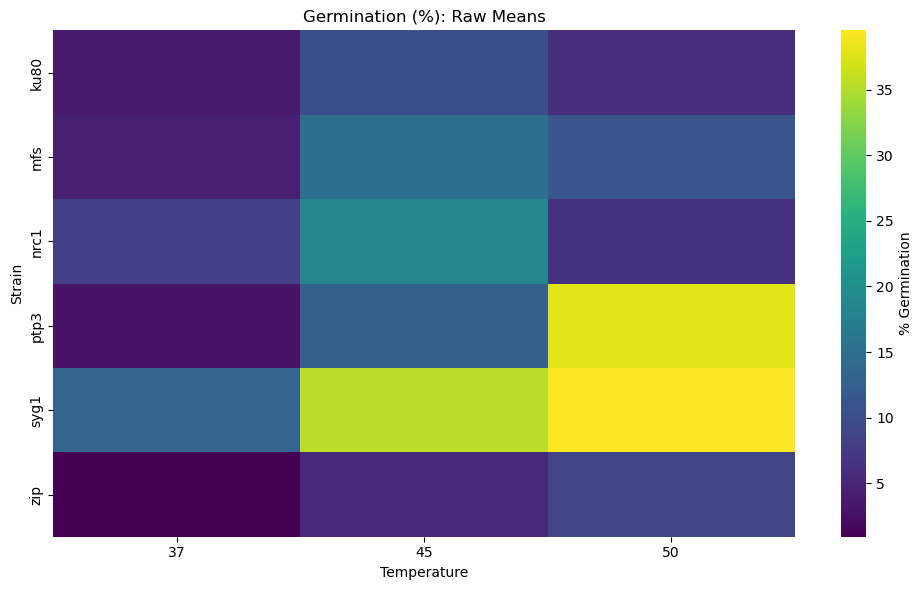

In [4]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/09_26_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()


### 10/03/2025

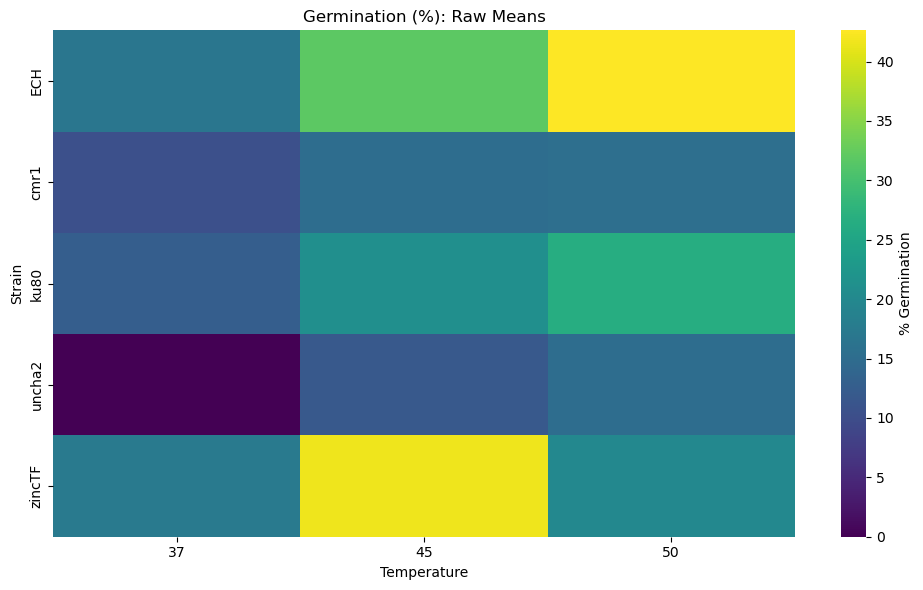

In [3]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_03_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()


# 10/14/2025

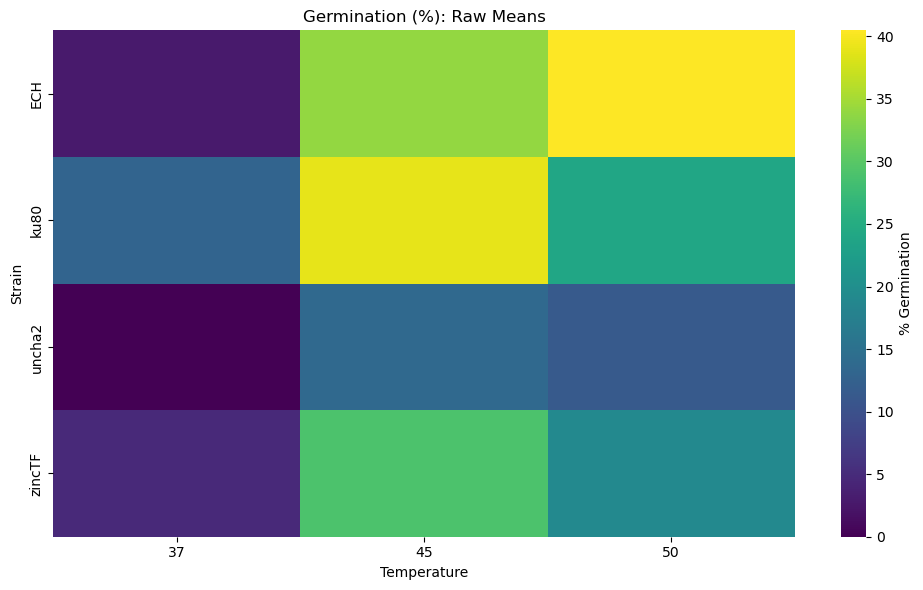

In [10]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_13_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()


## combining all gene replicates

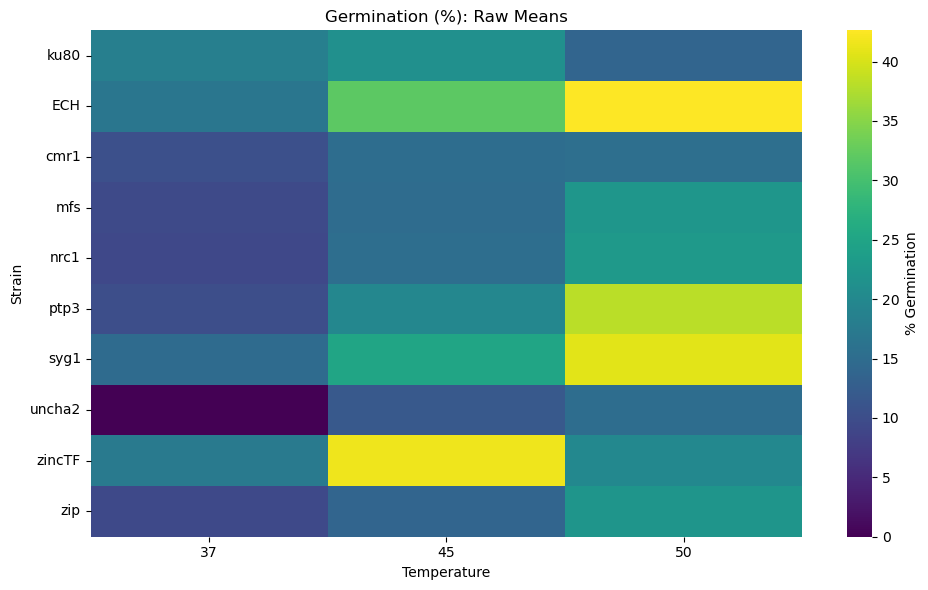

In [5]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
desired_order = ["ku80"] + [s for s in heat.index if s != "ku80"]
heat = heat.reindex(desired_order)

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()

#### without cmr1 gene

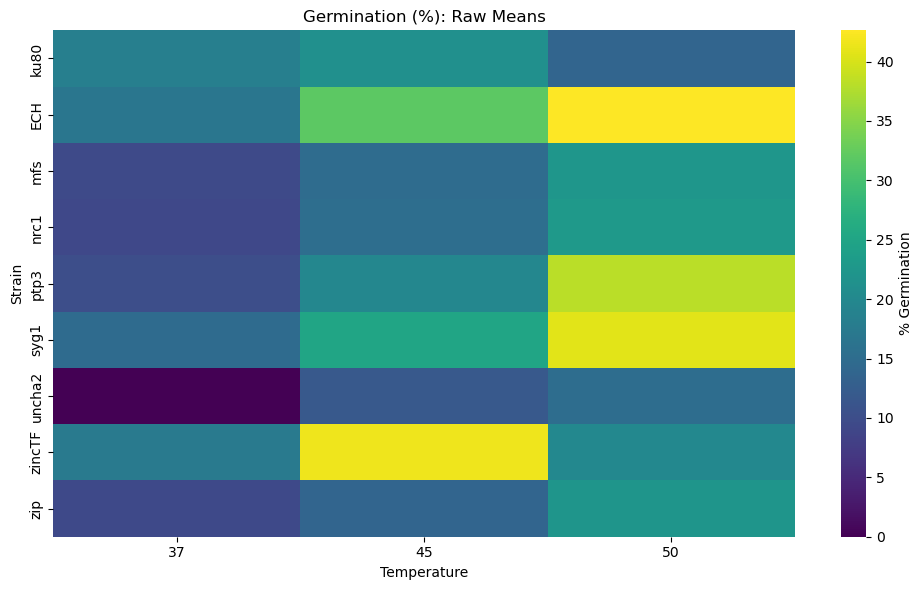

In [8]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates-Copy1.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
desired_order = ["ku80"] + [s for s in heat.index if s != "ku80"]
heat = heat.reindex(desired_order)

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()

# plot of combined genes with 2 replicates of ECH, uncha2, zincTF 

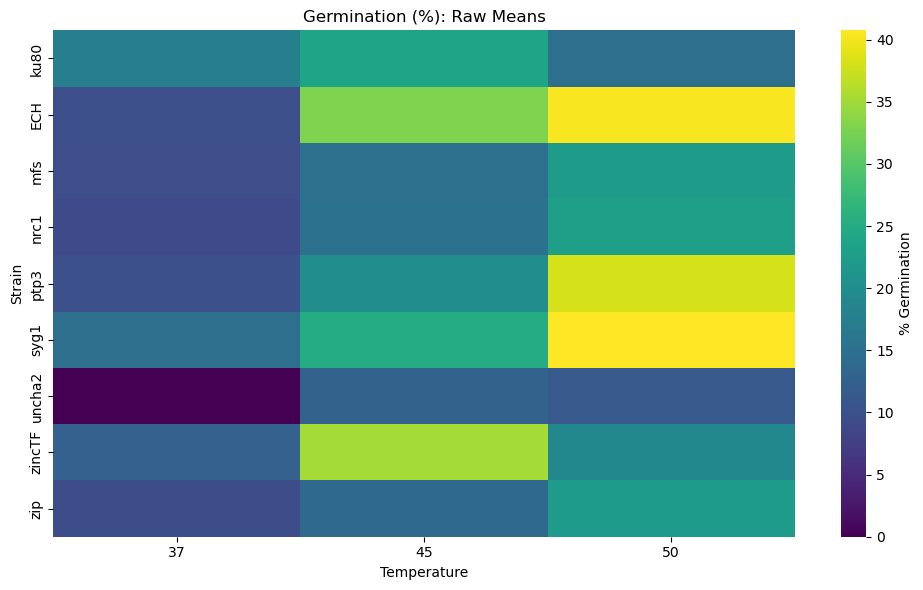

In [1]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
desired_order = ["ku80"] + [s for s in heat.index if s != "ku80"]
heat = heat.reindex(desired_order)

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")
plt.tight_layout()
plt.show()

### plot of combined genes with 2 replicates of ECH, uncha2, zincTF without 45C data

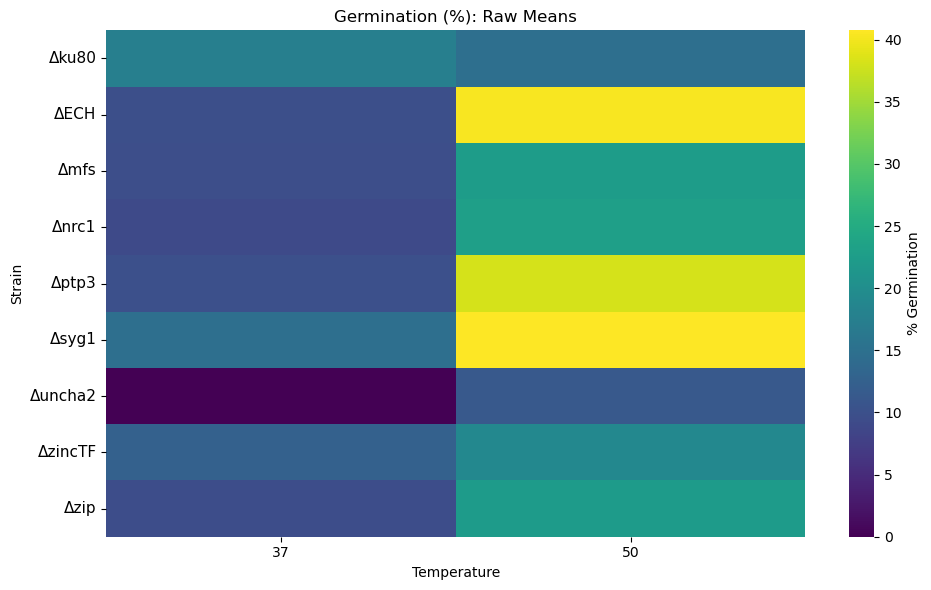

In [8]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
desired_order = ["ku80"] + [s for s in heat.index if s.lower() != "ku80"]
heat = heat.reindex(desired_order)

# ---- Add Δ symbol in front of all strain names (including ku80) ----
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")

# Optional: make labels a bit bolder/larger for readability
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()


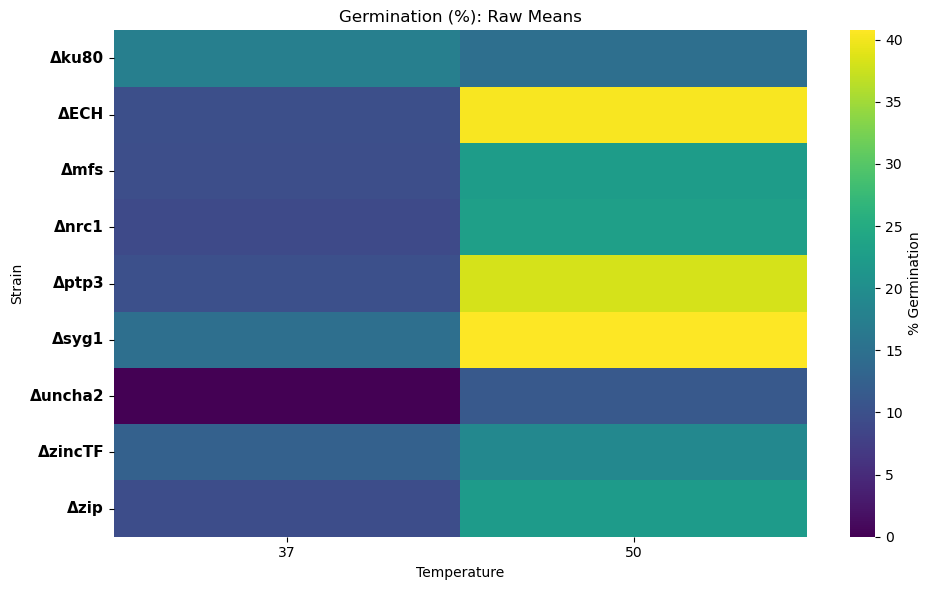

In [7]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
desired_order = ["ku80"] + [s for s in heat.index if s.lower() != "ku80"]
heat = heat.reindex(desired_order)

# ---- Add Δ symbol in front of all strain names (including ku80) ----
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")

# Optional: make labels a bit bolder/larger for readability
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11, fontweight="bold")

plt.tight_layout()
plt.show()


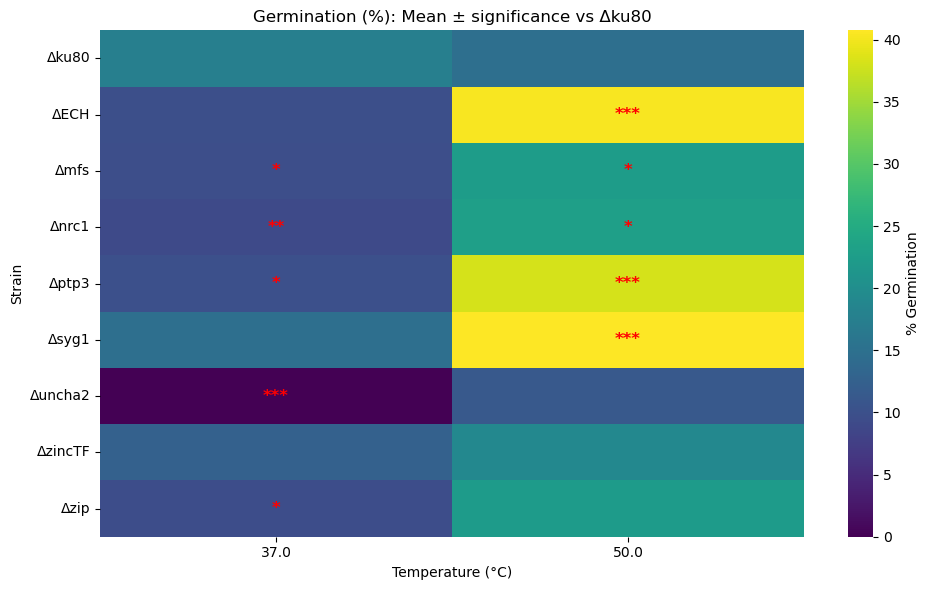

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helper to find column ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# ---- Run t-tests for each strain vs ku80 at each temperature ----
results = []
for temp, g in df.groupby("_TempNum"):
    control = g.loc[g[strain_col].str.lower()=="ku80","_Value"].dropna()
    for strain, sub in g.groupby(strain_col):
        if strain.lower()=="ku80":  # skip self
            continue
        test = sub["_Value"].dropna()
        if len(control)>1 and len(test)>1:
            stat, p = stats.ttest_ind(test, control, equal_var=False)
            results.append({"strain": strain, "temp": temp, "pval": p})
        else:
            results.append({"strain": strain, "temp": temp, "pval": np.nan})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if p<0.001 else "**" if p<0.01 else "*" if p<0.05 else ""
)

# ---- Pivot mean matrix for heatmap ----
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")
heat = heat.reindex(["ku80"] + [s for s in heat.index if s.lower()!="ku80"])

# ---- Add Δ prefix ----
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10,6))
ax = sns.heatmap(heat, cmap="viridis", annot=False, cbar_kws={"label":"% Germination"})
ax.set_title("Germination (%): Mean ± significance vs Δku80")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")

# ---- Annotate significance markers ----
for _, row in stats_df.iterrows():
    strain = row["strain"]
    if strain.lower() == "ku80":  # Skip control strain
        continue
    sig = row["sig"]
    if sig:
        y = list(heat.index).index(f"Δ{strain}")
        x = list(heat.columns).index(row["temp"])
        ax.text(
            x + 0.5, y + 0.5, sig,
            color="red",              # red text for significance
            ha="center", va="center",
            fontsize=12, fontweight="bold"
        )

plt.tight_layout()
plt.show()



Means at 37°C:
strain
ECH        9.788360
ku80      17.506330
mfs        9.645643
nrc1       9.228065
ptp3      10.024255
syg1      14.764442
uncha2     0.000000
zincTF    12.569444
zip        9.395970
Name: _Value, dtype: float64

Standard deviations at 37°C:
strain
ECH        9.456331
ku80      12.316996
mfs        6.878833
nrc1       5.553536
ptp3       9.228035
syg1      11.950842
uncha2     0.000000
zincTF    16.391747
zip       10.252986
Name: _Value, dtype: float64

ΔECH vs Δku80 at 37°C: p-value = 0.1288


Replicate counts per strain per temperature:
strain  _TempNum
ECH     37.0         6
        50.0         6
ku80    37.0        22
        50.0        22
mfs     37.0        16
        50.0        15
nrc1    37.0        16
        50.0        15
ptp3    37.0        15
        50.0        15
syg1    37.0        16
        50.0        15
uncha2  37.0         6
        50.0         6
zincTF  37.0         8
        50.0         6
zip     37.0        17
        50.0        15
Nam

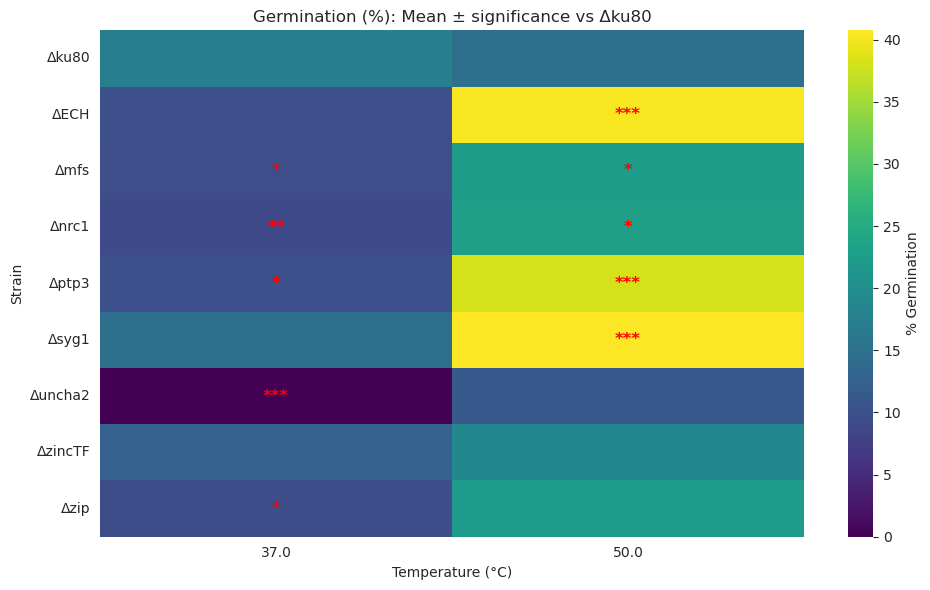

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helper to find column ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])
# ---- Diagnostic Check for ΔECH vs Δku80 at 37°C ----
print("\nMeans at 37°C:")
print(df[df["_TempNum"]==37].groupby(strain_col)["_Value"].mean())

print("\nStandard deviations at 37°C:")
print(df[df["_TempNum"]==37].groupby(strain_col)["_Value"].std())

# Direct t-test for ΔECH vs Δku80 at 37°C
ech_37 = df[(df[strain_col].str.lower()=="ech") & (df["_TempNum"]==37)]["_Value"]
ku80_37 = df[(df[strain_col].str.lower()=="ku80") & (df["_TempNum"]==37)]["_Value"]

stat, p = stats.ttest_ind(ech_37, ku80_37, equal_var=False)
print(f"\nΔECH vs Δku80 at 37°C: p-value = {p:.4f}\n")
print("\nReplicate counts per strain per temperature:")
print(df.groupby([strain_col, "_TempNum"])["_Value"].count(), "\n")

# ---- Run t-tests for each strain vs ku80 at each temperature ----
results = []
for temp, g in df.groupby("_TempNum"):
    control = g.loc[g[strain_col].str.lower()=="ku80","_Value"].dropna()
    for strain, sub in g.groupby(strain_col):
        if strain.lower()=="ku80":  # skip self
            continue
        test = sub["_Value"].dropna()
        if len(control)>1 and len(test)>1:
            stat, p = stats.ttest_ind(test, control, equal_var=False)
            results.append({"strain": strain, "temp": temp, "pval": p})
        else:
            results.append({"strain": strain, "temp": temp, "pval": np.nan})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if p<0.001 else "**" if p<0.01 else "*" if p<0.05 else ""
)

# ---- Pivot mean matrix for heatmap ----
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")
heat = heat.reindex(["ku80"] + [s for s in heat.index if s.lower()!="ku80"])

# ---- Add Δ prefix ----
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10,6))
ax = sns.heatmap(heat, cmap="viridis", annot=False, cbar_kws={"label":"% Germination"})
ax.set_title("Germination (%): Mean ± significance vs Δku80")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")

# ---- Annotate significance markers ----
for _, row in stats_df.iterrows():
    strain = row["strain"]
    if strain.lower() == "ku80":  # Skip control strain
        continue
    sig = row["sig"]
    if sig:
        y = list(heat.index).index(f"Δ{strain}")
        x = list(heat.columns).index(row["temp"])
        ax.text(
            x + 0.5, y + 0.5, sig,
            color="red",              # red text for significance
            ha="center", va="center",
            fontsize=12, fontweight="bold"
        )

plt.tight_layout()
plt.show()


### significance between temp alone for each gene

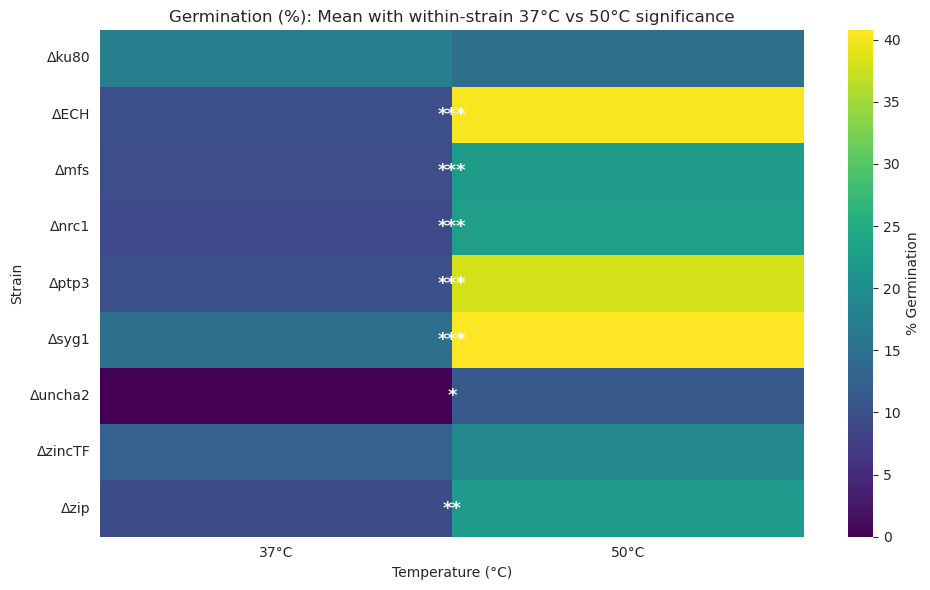

In [3]:
# ==== GERMINATION HEATMAP + WITHIN-STRAIN 37°C vs 50°C T-TESTS ==============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}\nAvailable: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# Optional: keep only 37 and 50 if other temps slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ---- Run t-tests: within each strain, 37°C vs 50°C ----
results = []
for strain, g in df.groupby(strain_col):
    vals37 = g.loc[g["_TempNum"] == 37, "_Value"].dropna()
    vals50 = g.loc[g["_TempNum"] == 50, "_Value"].dropna()
    if len(vals37) > 1 and len(vals50) > 1:
        stat, p = stats.ttest_ind(vals37, vals50, equal_var=False)
        results.append({"strain": strain, "pval": p, "n37": len(vals37), "n50": len(vals50)})
    else:
        results.append({"strain": strain, "pval": np.nan, "n37": len(vals37), "n50": len(vals50)})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if pd.notna(p) and p < 0.001
    else "**" if pd.notna(p) and p < 0.01
    else "*"  if pd.notna(p) and p < 0.05
    else ""
)

# ---- Pivot mean matrix for heatmap ----
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")

# Ensure columns are ordered [37, 50] if available
cols = [c for c in [37.0, 50.0] if c in heat.columns]
heat = heat[cols]

# Put ku80 first if present
if any(s.lower() == "ku80" for s in heat.index):
    heat = heat.reindex(["ku80"] + [s for s in heat.index if s.lower() != "ku80"])

# Add Δ prefix to all (including ku80) for display
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot heatmap ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heat, cmap="viridis", annot=False, cbar_kws={"label":"% Germination"})
ax.set_title("Germination (%): Mean with within-strain 37°C vs 50°C significance")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")

# ---- Annotate significance (centered between the two temp columns) ----
# Determine x-position: if both temps exist, place in the middle; if only one, place on it.
if len(cols) == 2:
    x_pos = (list(heat.columns).index(37.0) + list(heat.columns).index(50.0)) / 2 + 0.5
else:
    # fallback if a dataset has only one of the temps
    x_pos = list(range(len(heat.columns)))[0] + 0.5

for _, row in stats_df.iterrows():
    sig = row["sig"]
    if sig:
        label = f"Δ{row['strain']}"
        if label in heat.index:
            y = list(heat.index).index(label)
            ax.text(
                x_pos, y + 0.5, sig,
                color="white", ha="center", va="center",
                fontsize=13, fontweight="bold"
            )

# Cosmetic x tick labels
ax.set_xticklabels([f"{int(c)}°C" if float(c).is_integer() else f"{c:.1f}°C" for c in heat.columns])

plt.tight_layout()
plt.show()


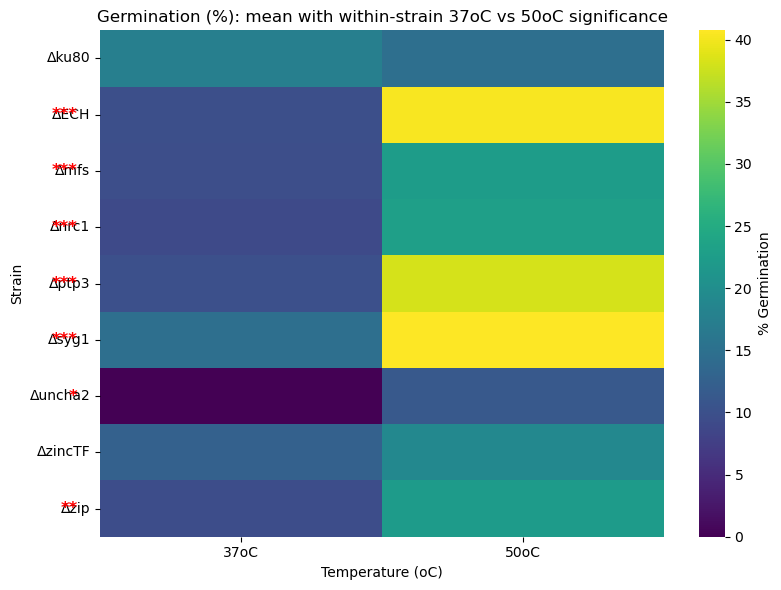

In [4]:
# ==== GERMINATION HEATMAP + WITHIN-STRAIN 37 vs 50 T-TESTS (stars before labels) ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import matplotlib.transforms as mtransforms  # <-- for placing stars in the left margin

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}\nAvailable: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# Keep only 37 and 50
df = df[df["_TempNum"].isin([37, 50])]

# ---- Run t-tests: within each strain, 37oC vs 50oC ----
results = []
for strain, g in df.groupby(strain_col):
    vals37 = g.loc[g["_TempNum"] == 37, "_Value"].dropna()
    vals50 = g.loc[g["_TempNum"] == 50, "_Value"].dropna()
    if len(vals37) > 1 and len(vals50) > 1:
        stat, p = stats.ttest_ind(vals37, vals50, equal_var=False)
        results.append({"strain": strain, "pval": p, "n37": len(vals37), "n50": len(vals50)})
    else:
        results.append({"strain": strain, "pval": np.nan, "n37": len(vals37), "n50": len(vals50)})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if pd.notna(p) and p < 0.001
    else "**" if pd.notna(p) and p < 0.01
    else "*"  if pd.notna(p) and p < 0.05
    else ""
)

# ---- Pivot mean matrix for heatmap ----
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")

# Ensure columns are ordered [37, 50] if available
cols = [c for c in [37.0, 50.0] if c in heat.columns]
heat = heat[cols]

# Put ku80 first if present
if any(str(s).lower() == "ku80" for s in heat.index):
    heat = heat.reindex(["ku80"] + [s for s in heat.index if str(s).lower() != "ku80"])

# Add Δ prefix for display
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Build a map from display name -> star string ----
# (stars summarize the *within-strain* 37 vs 50 t-test)
sig_map = {f"Δ{row['strain']}": row["sig"] for _, row in stats_df.iterrows()}

# ---- Plot heatmap ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(heat, cmap="viridis", annot=False, cbar_kws={"label":"% Germination"})
ax.set_title("Germination (%): mean with within-strain 37oC vs 50oC significance")
ax.set_xlabel("Temperature (oC)")
ax.set_ylabel("Strain")

# Cosmetic x tick labels in your preferred style (no space, 'oC')
ax.set_xticklabels([f"{int(c)}oC" if float(c).is_integer() else f"{c:.1f}oC" for c in heat.columns], rotation=0)

# ---- Draw significance stars OUTSIDE the heatmap, before strain names ----
# We'll place one star group per row, centered vertically, at a fixed left margin position.
# Use a blended transform: x in axes fraction (so we can go slightly left), y in data coords
trans = mtransforms.blended_transform_factory(ax.transAxes, ax.transData)

x_left = -0.04  # a bit left of the y-axis (tweak if needed)
for i, disp_label in enumerate(heat.index):
    sig = sig_map.get(disp_label, "")
    if not sig:
        continue
    ax.text(
        x_left, i + 0.5, sig,
        transform=trans, ha="right", va="center",
        color="red", fontsize=12, fontweight="bold", clip_on=False
    )

# Give extra room on the left so the stars aren't cut off
plt.tight_layout()
plt.gcf().subplots_adjust(left=0.28)  # increase if stars clip on your system

plt.show()



===== TWO-WAY ANOVA (Type II) =====
                   sum_sq     df           F        PR(>F)
Strain        6914.324226    8.0    8.061742  1.585782e-09
Temp         11813.536203    1.0  110.191743  3.828443e-21
Strain:Temp   6773.853360    8.0    7.897960  2.515884e-09
Residual     23478.750371  219.0         NaN           NaN

[Saved] ANOVA table -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/two_way_ANOVA_strain_temp_interaction.csv

===== Tukey HSD: pairwise on Strain×Temp combinations =====
      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj   lower    upper   reject
----------------------------------------------------------------
   ECH_37.0    ECH_50.0  30.6121 0.0001   9.5033  51.7209   True
   ECH_37.0   ku80_37.0    7.718  0.978   -9.121   24.557  False
   ECH_37.0   ku80_50.0   4.9629 0.9999 -11.8761  21.8019  False
   ECH_37.0    mfs_37.0  -0.1427    1.0 -17.6452  17.3598  F

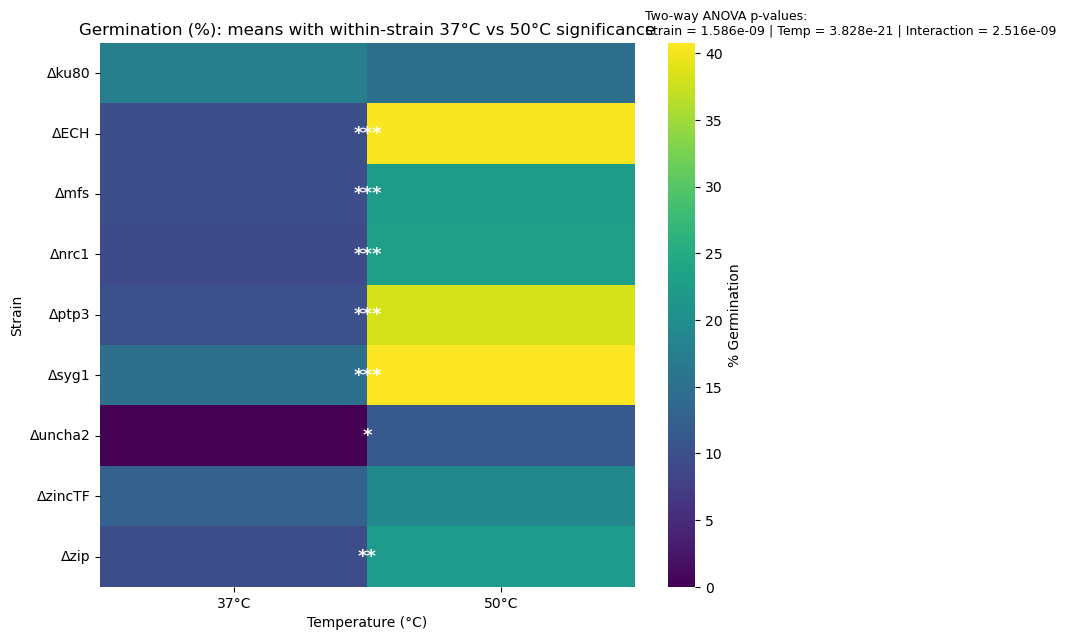

In [1]:
# ==== GERMINATION HEATMAP + TWO-WAY ANOVA (Strain, Temp, Interaction) =======
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from pathlib import Path

# Statsmodels for ANOVA and posthoc
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"
SAVE_ANOVA = True
SAVE_TUKEY = True
DO_TUKEY  = True  # Set False to skip pairwise posthoc

# ---- Helpers ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}\nAvailable: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# Optional: keep only 37 and 50 if other temps slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ==== TWO-WAY ANOVA (Strain, Temp, Interaction) ==============================
# Prepare categorical factors
df_anova = df.copy()
df_anova["Strain"] = df_anova[strain_col].astype("category")
df_anova["Temp"]   = df_anova["_TempNum"].astype("category")

# Fit model with interaction
model = ols("_Value ~ Strain * Temp", data=df_anova).fit()

# Type II ANOVA (robust when unbalanced across groups)
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n===== TWO-WAY ANOVA (Type II) =====")
print(anova_table)

# Save ANOVA table
if SAVE_ANOVA:
    out_anova = Path(FILE).with_name("two_way_ANOVA_strain_temp_interaction.csv")
    anova_table.to_csv(out_anova)
    print(f"\n[Saved] ANOVA table -> {out_anova}")

# Optional: Tukey HSD on Strain×Temp combinations (post-hoc)
if DO_TUKEY:
    combo = df_anova["Strain"].astype(str) + "_" + df_anova["Temp"].astype(str)
    tukey = pairwise_tukeyhsd(endog=df_anova["_Value"], groups=combo, alpha=0.05)
    print("\n===== Tukey HSD: pairwise on Strain×Temp combinations =====")
    print(tukey)
    if SAVE_TUKEY:
        # Convert Tukey results to a tidy DataFrame for saving
        tukey_df = pd.DataFrame(
            data=tukey._results_table.data[1:],  # skip header row
            columns=tukey._results_table.data[0]
        )
        out_tukey = Path(FILE).with_name("tukey_HSD_strainXtemp.csv")
        tukey_df.to_csv(out_tukey, index=False)
        print(f"[Saved] Tukey HSD table -> {out_tukey}")

# ==== Within-strain Welch t-tests: 37°C vs 50°C (for heatmap stars) ==========
results = []
for strain, g in df.groupby(strain_col, sort=False):
    vals37 = g.loc[g["_TempNum"] == 37, "_Value"].dropna()
    vals50 = g.loc[g["_TempNum"] == 50, "_Value"].dropna()
    if len(vals37) > 1 and len(vals50) > 1:
        stat, p = stats.ttest_ind(vals37, vals50, equal_var=False)
        results.append({"strain": strain, "pval": p, "n37": len(vals37), "n50": len(vals50)})
    else:
        results.append({"strain": strain, "pval": np.nan, "n37": len(vals37), "n50": len(vals50)})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if pd.notna(p) and p < 0.001
    else "**" if pd.notna(p) and p < 0.01
    else "*"  if pd.notna(p) and p < 0.05
    else ""
)

# ==== Heatmap of mean % germination by Strain × Temp =========================
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")

# Ensure columns are ordered [37, 50] if available
cols = [c for c in [37.0, 50.0] if c in heat.columns]
if len(cols) == 0:
    cols = list(heat.columns)  # fallback
heat = heat[cols]

# Put ku80 first if present (case-insensitive match)
if any(str(s).lower() == "ku80" for s in heat.index):
    new_order = ["ku80"] + [s for s in heat.index if str(s).lower() != "ku80"]
    # Only keep those actually present
    new_order = [s for s in new_order if s in heat.index]
    heat = heat.reindex(new_order)

# Add Δ prefix to all (including ku80) for display
display_index = [f"Δ{s}" for s in heat.index]
heat.index = display_index

# ---- Plot heatmap ----
plt.figure(figsize=(10.5, 6.5))
ax = sns.heatmap(heat, cmap="viridis", annot=False, cbar_kws={"label":"% Germination"})
ax.set_title("Germination (%): means with within-strain 37°C vs 50°C significance")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")

# ---- Annotate t-test significance (centered between the two temp columns) ---
if len(cols) >= 1:
    if len(cols) == 2:
        x_pos = (list(heat.columns).index(cols[0]) + list(heat.columns).index(cols[1])) / 2 + 0.5
    else:
        x_pos = 0.5  # if only one column, put star on that column

    # Map stats rows to display labels with Δ prefix
    sig_map = {f"Δ{row['strain']}": row["sig"] for _, row in stats_df.iterrows()}
    for y, label in enumerate(heat.index):
        sig = sig_map.get(label, "")
        if sig:
            ax.text(
                x_pos, y + 0.5, sig,
                color="white", ha="center", va="center",
                fontsize=13, fontweight="bold"
            )

# ---- Cosmetic x tick labels ----
ax.set_xticklabels([f"{int(c)}°C" if float(c).is_integer() else f"{c:.1f}°C" for c in heat.columns])

# ---- Add a small annotation with global ANOVA p-values (nice for figures) ---
try:
    # Extract p-values for display
    p_strain = anova_table.loc["Strain", "PR(>F)"] if "Strain" in anova_table.index else np.nan
    p_temp   = anova_table.loc["Temp",   "PR(>F)"] if "Temp"   in anova_table.index else np.nan
    p_inter  = anova_table.loc["Strain:Temp", "PR(>F)"] if "Strain:Temp" in anova_table.index else np.nan

    note = (f"Two-way ANOVA p-values:\n"
            f"Strain = {p_strain:.3e} | Temp = {p_temp:.3e} | Interaction = {p_inter:.3e}")
    ax.text(1.02, 1.01, note, transform=ax.transAxes, ha="left", va="bottom",
            fontsize=9, bbox=dict(boxstyle="round", alpha=0.15, facecolor="white", edgecolor="none"))
except Exception as e:
    # If anything odd with table structure, skip the annotation
    pass

plt.tight_layout()
plt.show()


### to check for effect of iron or zinc in the media

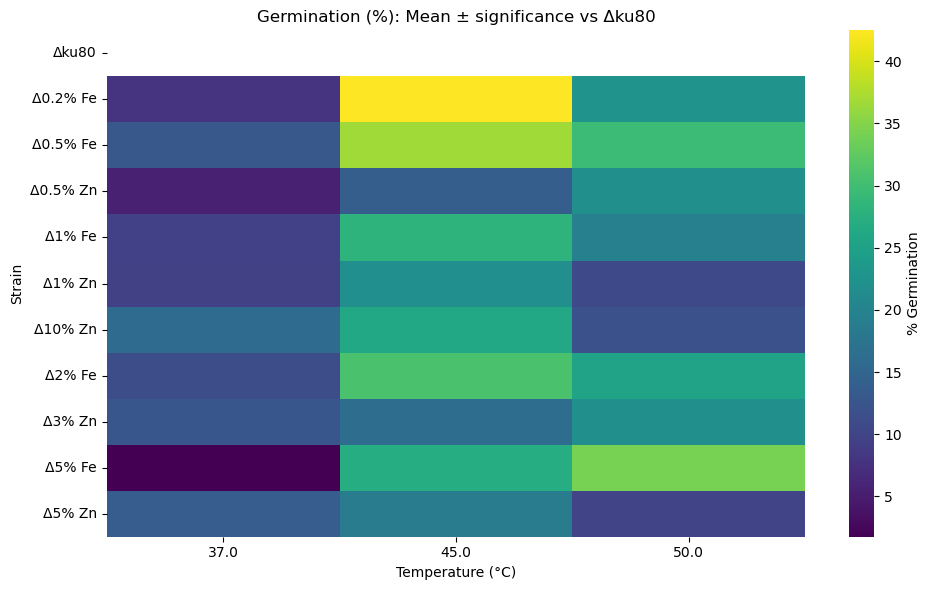

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun.csv"

# ---- Helper to find column ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# ---- Run t-tests for each strain vs ku80 at each temperature ----
results = []
for temp, g in df.groupby("_TempNum"):
    control = g.loc[g[strain_col].str.lower()=="ku80","_Value"].dropna()
    for strain, sub in g.groupby(strain_col):
        if strain.lower()=="ku80":  # skip self
            continue
        test = sub["_Value"].dropna()
        if len(control)>1 and len(test)>1:
            stat, p = stats.ttest_ind(test, control, equal_var=False)
            results.append({"strain": strain, "temp": temp, "pval": p})
        else:
            results.append({"strain": strain, "temp": temp, "pval": np.nan})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if p<0.001 else "**" if p<0.01 else "*" if p<0.05 else ""
)

# ---- Pivot mean matrix for heatmap ----
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")
heat = heat.reindex(["ku80"] + [s for s in heat.index if s.lower()!="ku80"])

# ---- Add Δ prefix ----
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10,6))
ax = sns.heatmap(heat, cmap="viridis", annot=False, cbar_kws={"label":"% Germination"})
ax.set_title("Germination (%): Mean ± significance vs Δku80")
ax.set_xlabel("Temperature (°C)")
ax.set_ylabel("Strain")

# ---- Annotate significance markers ----
for _, row in stats_df.iterrows():
    strain = row["strain"]
    if strain.lower() == "ku80":  # Skip control strain
        continue
    sig = row["sig"]
    if sig:
        y = list(heat.index).index(f"Δ{strain}")
        x = list(heat.columns).index(row["temp"])
        ax.text(
            x + 0.5, y + 0.5, sig,
            color="red",              # red text for significance
            ha="center", va="center",
            fontsize=12, fontweight="bold"
        )

plt.tight_layout()
plt.show()


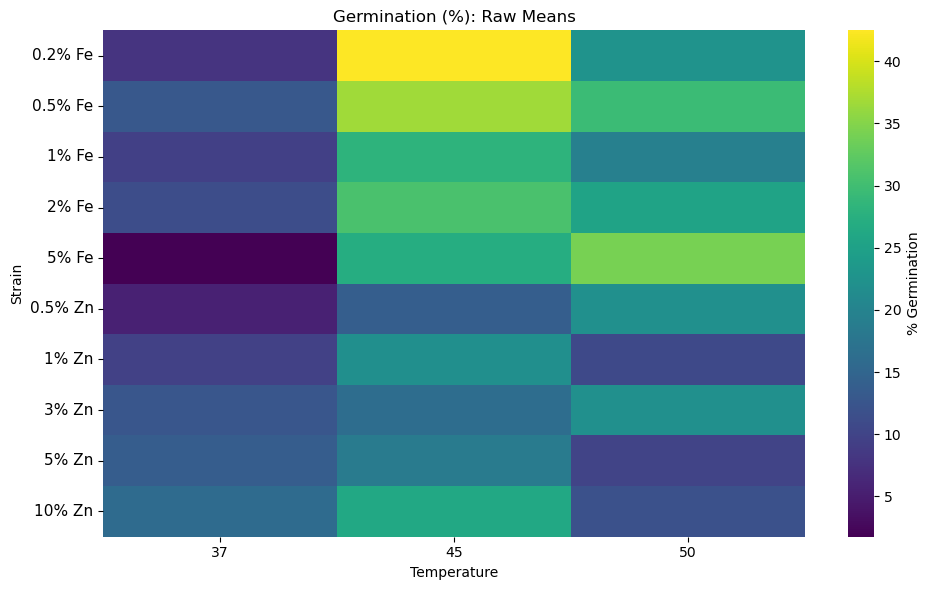

In [5]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
#desired_order = ["ku80"] + [s for s in heat.index if s.lower() != "ku80"]
#heat = heat.reindex(desired_order)

# ---- Reorder strains manually ----
desired_order = [
    "0.2% Fe",
    "0.5% Fe",
    "1% Fe",
    "2% Fe",
    "5% Fe",
    "0.5% Zn",
    "1% Zn",
    "3% Zn",
    "5% Zn",
    "10% Zn"
]
heat = heat.reindex([s for s in desired_order if s in heat.index])

# ---- Add Δ symbol in front of all strain names (including ku80) ----
#heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")

# Optional: make labels a bit bolder/larger for readability
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()


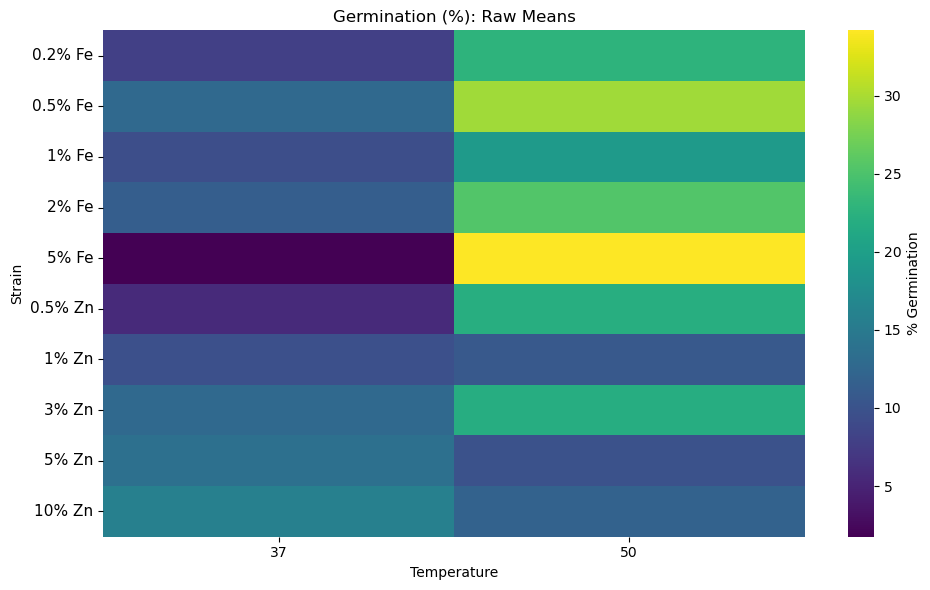

In [7]:
# ==== RAW % GERMINATION HEATMAP (robust column detection) ====================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}.\n"
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '45C' -> 45.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    # Compute % germination safely
    df["_PercentGerm"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
    value_col = "_PercentGerm"
else:
    # Coerce to numeric in case it's a string with % signs
    df["_PercentGerm"] = (
        pd.to_numeric(df[percent_col].astype(str).str.replace("%","", regex=False), errors="coerce")
    )
    value_col = "_PercentGerm"

# ---- Clean and order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
# Build label order preserving the original text associated with sorted numeric temps
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains so ku80 is at the top ----
#desired_order = ["ku80"] + [s for s in heat.index if s.lower() != "ku80"]
#heat = heat.reindex(desired_order)

# ---- Reorder strains manually ----
desired_order = [
    "0.2% Fe",
    "0.5% Fe",
    "1% Fe",
    "2% Fe",
    "5% Fe",
    "0.5% Zn",
    "1% Zn",
    "3% Zn",
    "5% Zn",
    "10% Zn"
]
heat = heat.reindex([s for s in desired_order if s in heat.index])

# ---- Add Δ symbol in front of all strain names (including ku80) ----
#heat.index = [f"Δ{s}" for s in heat.index]

# ---- Plot ----
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    heat, cmap="viridis", annot=False, fmt=".1f",
    cbar_kws={"label": "% Germination"}
)
ax.set_title("Germination (%): Raw Means")
ax.set_xlabel("Temperature")
ax.set_ylabel("Strain")

# Optional: make labels a bit bolder/larger for readability
ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

plt.tight_layout()
plt.show()


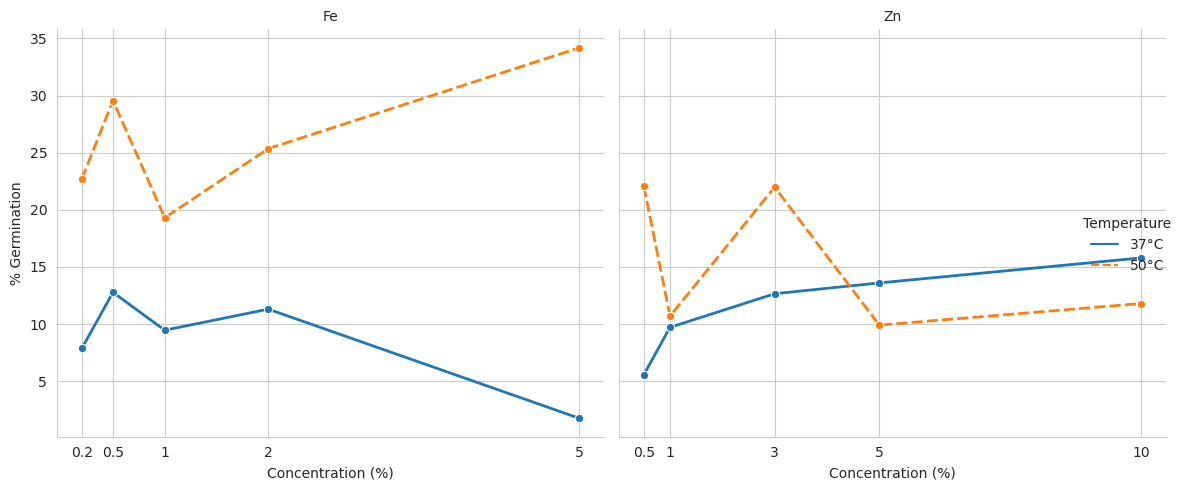

In [1]:
# ==== RAW % GERMINATION: LINES vs CONCENTRATION (robust parsing) ============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C_and_Fe.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(
            f"Could not find a column for {purpose or candidates}.\n"
            f"Available columns: {list(df.columns)}"
        )
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '50C' -> 50.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse strings like '0.5% Fe' or '10% Zn' -> (conc_float, metal_str).
    Returns (np.nan, '') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    df["_PercentGerm"] = (
        df[germ_col].astype(float) /
        df[total_col].replace(0, np.nan).astype(float)
    ) * 100
    value_col = "_PercentGerm"
else:
    df["_PercentGerm"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%", "", regex=False),
        errors="coerce"
    )
    value_col = "_PercentGerm"

# ---- Clean & order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains (so x will appear sorted nicely later) ----
desired_order = [
    "0.2% Fe", "0.5% Fe", "1% Fe", "2% Fe", "5% Fe",
    "0.5% Zn", "1% Zn", "3% Zn", "5% Zn", "10% Zn"
]
heat = heat.reindex([s for s in desired_order if s in heat.index])

# ====================== Build data for concentration x-axis ==================
long_df = heat.reset_index().melt(
    id_vars=strain_col, var_name="Temperature", value_name="% Germination"
)

# Parse concentration and metal from strain/condition labels
conc_metal = long_df[strain_col].apply(parse_condition)
long_df["Conc"]  = [cm[0] for cm in conc_metal]
long_df["Metal"] = [cm[1] for cm in conc_metal]

# Drop rows without parsed info
long_df = long_df.dropna(subset=["Conc", "% Germination"])

# Make a clean temperature label for legend (e.g., "37°C", "50°C")
long_df["TempNum"] = long_df["Temperature"].apply(to_num_temp)
long_df["TempLabel"] = long_df["TempNum"].map(
    lambda t: f"{int(t)}°C" if pd.notna(t) and float(t).is_integer() else f"{t:.1f}°C"
)

# Sort by metal then concentration so lines connect in order
long_df = long_df.sort_values(["Metal", "Conc", "TempNum"])

# ================================ Plot ======================================
sns.set_style("whitegrid")
g = sns.relplot(
    data=long_df,
    x="Conc", y="% Germination",
    hue="TempLabel", style="TempLabel",
    col="Metal", kind="line", marker="o",
    linewidth=2, height=5, aspect=1.1,
    facet_kws={"sharey": True, "sharex": False}
)

# Axis cosmetics
for ax in g.axes.flatten():
    ax.set_xlabel("Concentration (%)")
    ax.set_ylabel("% Germination")
    ax.set_xticks(sorted(long_df.loc[long_df["Metal"] == ax.get_title().split(' = ')[-1], "Conc"].unique()))
    # Keep nice integer tick labels where possible
    xticks = ax.get_xticks()
    ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

g.set_titles("{col_name}")
g._legend.set_title("Temperature")
plt.tight_layout()
plt.show()


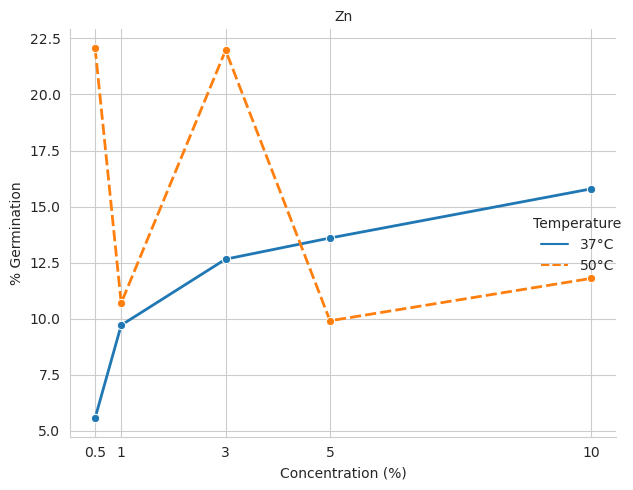

In [2]:
# ==== RAW % GERMINATION: LINES vs CONCENTRATION (robust parsing) ============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C_and_Fe.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(
            f"Could not find a column for {purpose or candidates}.\n"
            f"Available columns: {list(df.columns)}"
        )
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '50C' -> 50.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse strings like '0.5% Fe' or '10% Zn' -> (conc_float, metal_str).
    Returns (np.nan, '') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    df["_PercentGerm"] = (
        df[germ_col].astype(float) /
        df[total_col].replace(0, np.nan).astype(float)
    ) * 100
    value_col = "_PercentGerm"
else:
    df["_PercentGerm"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%", "", regex=False),
        errors="coerce"
    )
    value_col = "_PercentGerm"

# ---- Clean & order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains (so x will appear sorted nicely later) ----
desired_order = [
    "0.2% Fe", "0.5% Fe", "1% Fe", "2% Fe", "5% Fe",
    "0.5% Zn", "1% Zn", "3% Zn", "5% Zn", "10% Zn"
]
heat = heat.reindex([s for s in desired_order if s in heat.index])

# ====================== Build data for concentration x-axis ==================
long_df = heat.reset_index().melt(
    id_vars=strain_col, var_name="Temperature", value_name="% Germination"
)

# Parse concentration and metal from strain/condition labels
conc_metal = long_df[strain_col].apply(parse_condition)
long_df["Conc"]  = [cm[0] for cm in conc_metal]
long_df["Metal"] = [cm[1] for cm in conc_metal]

# Drop rows without parsed info
long_df = long_df.dropna(subset=["Conc", "% Germination"])

# Make a clean temperature label for legend (e.g., "37°C", "50°C")
long_df["TempNum"] = long_df["Temperature"].apply(to_num_temp)
long_df["TempLabel"] = long_df["TempNum"].map(
    lambda t: f"{int(t)}°C" if pd.notna(t) and float(t).is_integer() else f"{t:.1f}°C"
)

# Sort by metal then concentration so lines connect in order
long_df = long_df.sort_values(["Metal", "Conc", "TempNum"])

# ================================ Plot ======================================
sns.set_style("whitegrid")
g = sns.relplot(
    data=long_df,
    x="Conc", y="% Germination",
    hue="TempLabel", style="TempLabel",
    col="Metal", kind="line", marker="o",
    linewidth=2, height=5, aspect=1.1,
    facet_kws={"sharey": True, "sharex": False}
)

# Axis cosmetics
for ax in g.axes.flatten():
    ax.set_xlabel("Concentration (%)")
    ax.set_ylabel("% Germination")
    ax.set_xticks(sorted(long_df.loc[long_df["Metal"] == ax.get_title().split(' = ')[-1], "Conc"].unique()))
    # Keep nice integer tick labels where possible
    xticks = ax.get_xticks()
    ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

g.set_titles("{col_name}")
g._legend.set_title("Temperature")
plt.tight_layout()
plt.show()


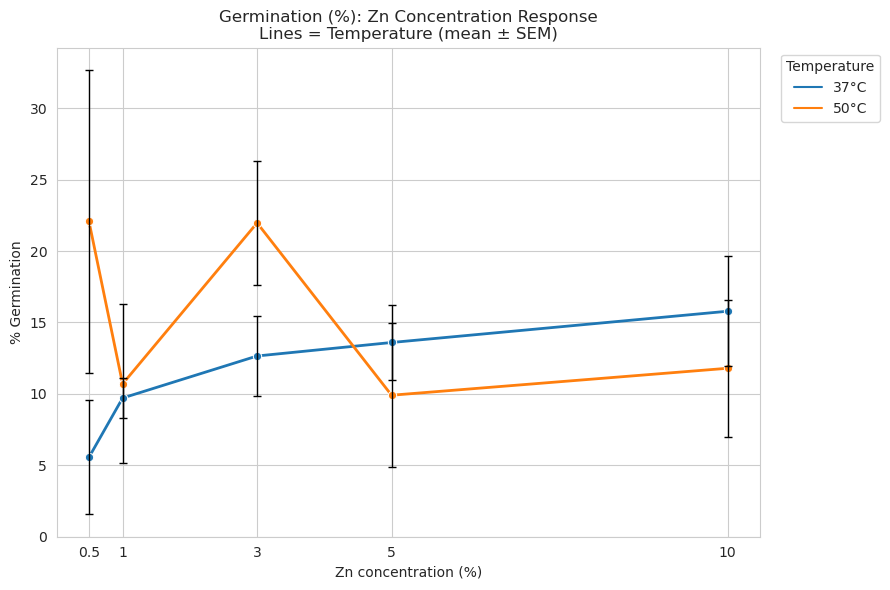

In [4]:
# ==== GERMINATION: x = Zn concentration, lines = Temperature (mean ± SEM) ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C_and_Fe.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}. "
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse '0.5% Zn' -> (0.5, 'Zn'); '5% Fe' -> (5.0, 'Fe'); returns (nan,'') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive) ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"], purpose="strain/condition label")
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"], purpose="temperature")
percent_col = find_col(
    df, ["percent_germinated","Percent_Germinated","%Germination","Germination","germination"],
    required=False, purpose="% germination"
)

# ---- Make numeric % germination ----
if percent_col is None:
    germ_col  = find_col(df, ["germinated","Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total","Total","count","Count"], purpose="total count")
    df["_Value"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
else:
    df["_Value"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%","", regex=False),
        errors="coerce"
    )

# ---- Clean/parse ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df[["_Conc","_Metal"]] = pd.DataFrame([parse_condition(s) for s in df[strain_col]])
df = df.dropna(subset=["_Value","_TempNum","_Conc"])

# Keep only Zn series (your request)
df = df[df["_Metal"] == "Zn"]

# Optional: restrict to 37 and 50 if anything else slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ---- Aggregate mean & SEM by (Conc, Temp) ----
summary = (
    df.groupby(["_Conc","_TempNum"])["_Value"]
      .agg(mean="mean", sem="sem", n="count")
      .reset_index()
)

# Pretty temperature labels
summary["TempLabel"] = summary["_TempNum"].apply(lambda t: f"{int(t)}°C" if float(t).is_integer() else f"{t:.1f}°C")

# Concentration order on x-axis
conc_order = sorted(summary["_Conc"].unique())
summary["_Conc"] = pd.Categorical(summary["_Conc"], categories=conc_order, ordered=True)

# ---- Plot: x = Zn concentration, lines = temperature, error bars = SEM ----
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
ax = sns.lineplot(
    data=summary.sort_values(["_TempNum","_Conc"]),
    x="_Conc", y="mean",
    hue="TempLabel", marker="o", linewidth=2
)

# Manual error bars (SEM) per point
for _, r in summary.iterrows():
    ax.errorbar(r["_Conc"], r["mean"], yerr=r["sem"], fmt="none", ecolor="black", capsize=3, linewidth=1)

ax.set_title("Germination (%): Zn Concentration Response\nLines = Temperature (mean ± SEM)")
ax.set_xlabel("Zn concentration (%)")
ax.set_ylabel("% Germination")
ax.legend(title="Temperature", bbox_to_anchor=(1.02, 1), loc="upper left")

# Nice integer-ish x tick labels
xticks = conc_order
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

plt.tight_layout()
plt.show()


### zinc rep 2

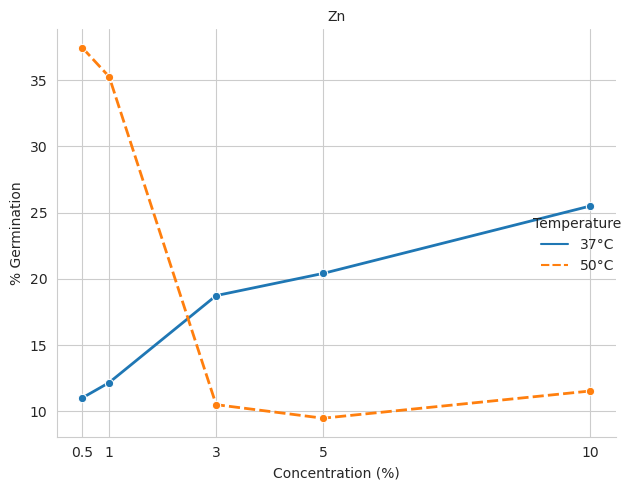

In [1]:
# ==== RAW % GERMINATION: LINES vs CONCENTRATION (robust parsing) ============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun_rep_2.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(
            f"Could not find a column for {purpose or candidates}.\n"
            f"Available columns: {list(df.columns)}"
        )
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '50C' -> 50.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse strings like '0.5% Fe' or '10% Zn' -> (conc_float, metal_str).
    Returns (np.nan, '') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    df["_PercentGerm"] = (
        df[germ_col].astype(float) /
        df[total_col].replace(0, np.nan).astype(float)
    ) * 100
    value_col = "_PercentGerm"
else:
    df["_PercentGerm"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%", "", regex=False),
        errors="coerce"
    )
    value_col = "_PercentGerm"

# ---- Clean & order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains (so x will appear sorted nicely later) ----
desired_order = [
    "0.2% Fe", "0.5% Fe", "1% Fe", "2% Fe", "5% Fe",
    "0.5% Zn", "1% Zn", "3% Zn", "5% Zn", "10% Zn"
]
heat = heat.reindex([s for s in desired_order if s in heat.index])

# ====================== Build data for concentration x-axis ==================
long_df = heat.reset_index().melt(
    id_vars=strain_col, var_name="Temperature", value_name="% Germination"
)

# Parse concentration and metal from strain/condition labels
conc_metal = long_df[strain_col].apply(parse_condition)
long_df["Conc"]  = [cm[0] for cm in conc_metal]
long_df["Metal"] = [cm[1] for cm in conc_metal]

# Drop rows without parsed info
long_df = long_df.dropna(subset=["Conc", "% Germination"])

# Make a clean temperature label for legend (e.g., "37°C", "50°C")
long_df["TempNum"] = long_df["Temperature"].apply(to_num_temp)
long_df["TempLabel"] = long_df["TempNum"].map(
    lambda t: f"{int(t)}°C" if pd.notna(t) and float(t).is_integer() else f"{t:.1f}°C"
)

# Sort by metal then concentration so lines connect in order
long_df = long_df.sort_values(["Metal", "Conc", "TempNum"])

# ================================ Plot ======================================
sns.set_style("whitegrid")
g = sns.relplot(
    data=long_df,
    x="Conc", y="% Germination",
    hue="TempLabel", style="TempLabel",
    col="Metal", kind="line", marker="o",
    linewidth=2, height=5, aspect=1.1,
    facet_kws={"sharey": True, "sharex": False}
)

# Axis cosmetics
for ax in g.axes.flatten():
    ax.set_xlabel("Concentration (%)")
    ax.set_ylabel("% Germination")
    ax.set_xticks(sorted(long_df.loc[long_df["Metal"] == ax.get_title().split(' = ')[-1], "Conc"].unique()))
    # Keep nice integer tick labels where possible
    xticks = ax.get_xticks()
    ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

g.set_titles("{col_name}")
g._legend.set_title("Temperature")
plt.tight_layout()
plt.show()


### two zinc bioreps combined

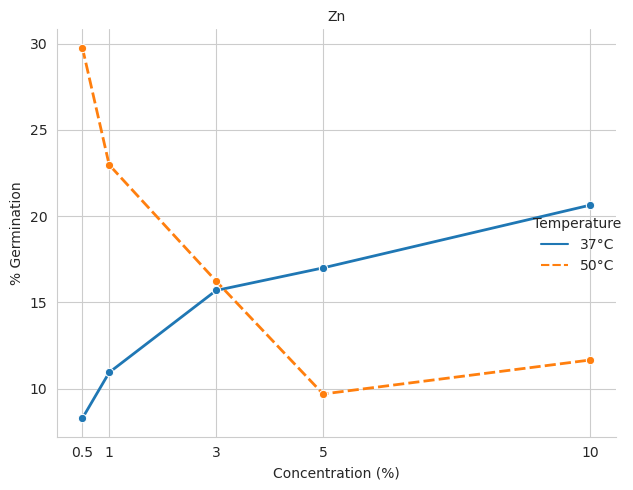

In [2]:
# ==== RAW % GERMINATION: LINES vs CONCENTRATION (robust parsing) ============
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C_and_Fe-bioreps.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    """Find first matching column in candidates (case-insensitive)."""
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(
            f"Could not find a column for {purpose or candidates}.\n"
            f"Available columns: {list(df.columns)}"
        )
    return None

def to_num_temp(x):
    """Extract numeric part of temperature like '50C' -> 50.0."""
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse strings like '0.5% Fe' or '10% Zn' -> (conc_float, metal_str).
    Returns (np.nan, '') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive, with synonyms) ----
strain_col = find_col(
    df, ["Strain", "strain", "Mutant", "mutant", "Genotype", "genotype"],
    purpose="strain"
)
temp_col = find_col(
    df, ["Temperature", "temperature", "Temp", "temp", "Temp_C", "temp_C"],
    purpose="temperature"
)

# Prefer a pre-computed percent column; otherwise compute from germinated/total
percent_col = find_col(
    df, ["percent_germinated", "Percent_Germinated", "%Germination", "Germination", "germination"],
    required=False
)
if percent_col is None:
    germ_col = find_col(df, ["germinated", "Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total", "Total", "count", "Count"], purpose="total count")
    df["_PercentGerm"] = (
        df[germ_col].astype(float) /
        df[total_col].replace(0, np.nan).astype(float)
    ) * 100
    value_col = "_PercentGerm"
else:
    df["_PercentGerm"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%", "", regex=False),
        errors="coerce"
    )
    value_col = "_PercentGerm"

# ---- Clean & order temperatures numerically ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
temp_labels = (
    df[[temp_col, "_TempNum"]]
    .drop_duplicates()
    .sort_values("_TempNum")[temp_col]
    .tolist()
)

# ---- Pivot (mean across replicates) ----
heat = df.pivot_table(
    index=strain_col,
    columns=temp_col,
    values=value_col,
    aggfunc="mean"
)[temp_labels]  # enforce numeric order

# ---- Reorder strains (so x will appear sorted nicely later) ----
desired_order = [
    "0.2% Fe", "0.5% Fe", "1% Fe", "2% Fe", "5% Fe",
    "0.5% Zn", "1% Zn", "3% Zn", "5% Zn", "10% Zn"
]
heat = heat.reindex([s for s in desired_order if s in heat.index])

# ====================== Build data for concentration x-axis ==================
long_df = heat.reset_index().melt(
    id_vars=strain_col, var_name="Temperature", value_name="% Germination"
)

# Parse concentration and metal from strain/condition labels
conc_metal = long_df[strain_col].apply(parse_condition)
long_df["Conc"]  = [cm[0] for cm in conc_metal]
long_df["Metal"] = [cm[1] for cm in conc_metal]

# Drop rows without parsed info
long_df = long_df.dropna(subset=["Conc", "% Germination"])

# Make a clean temperature label for legend (e.g., "37°C", "50°C")
long_df["TempNum"] = long_df["Temperature"].apply(to_num_temp)
long_df["TempLabel"] = long_df["TempNum"].map(
    lambda t: f"{int(t)}°C" if pd.notna(t) and float(t).is_integer() else f"{t:.1f}°C"
)

# Sort by metal then concentration so lines connect in order
long_df = long_df.sort_values(["Metal", "Conc", "TempNum"])

# ================================ Plot ======================================
sns.set_style("whitegrid")
g = sns.relplot(
    data=long_df,
    x="Conc", y="% Germination",
    hue="TempLabel", style="TempLabel",
    col="Metal", kind="line", marker="o",
    linewidth=2, height=5, aspect=1.1,
    facet_kws={"sharey": True, "sharex": False}
)

# Axis cosmetics
for ax in g.axes.flatten():
    ax.set_xlabel("Concentration (%)")
    ax.set_ylabel("% Germination")
    ax.set_xticks(sorted(long_df.loc[long_df["Metal"] == ax.get_title().split(' = ')[-1], "Conc"].unique()))
    # Keep nice integer tick labels where possible
    xticks = ax.get_xticks()
    ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

g.set_titles("{col_name}")
g._legend.set_title("Temperature")
plt.tight_layout()
plt.show()


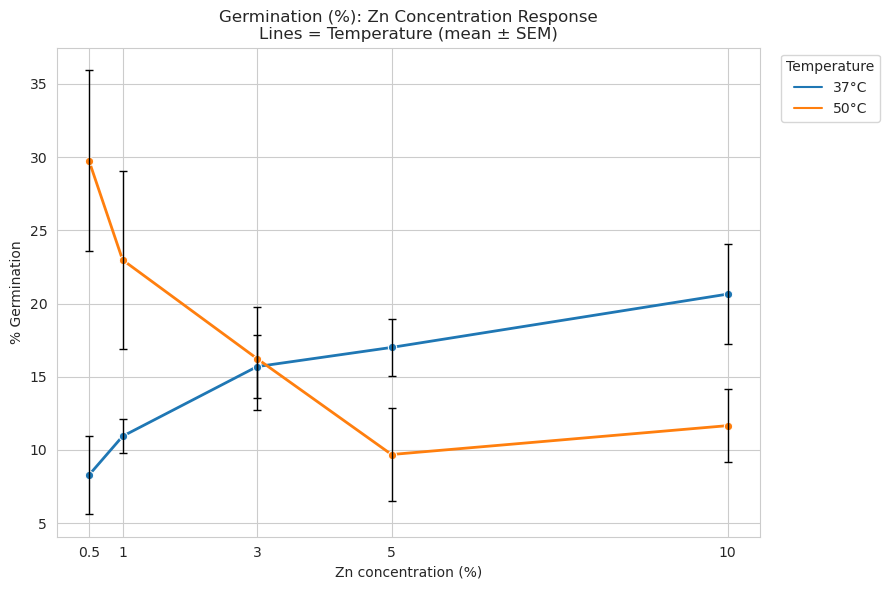

In [3]:
# ==== GERMINATION: x = Zn concentration, lines = Temperature (mean ± SEM) ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C_and_Fe-bioreps.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}. "
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse '0.5% Zn' -> (0.5, 'Zn'); '5% Fe' -> (5.0, 'Fe'); returns (nan,'') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive) ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"], purpose="strain/condition label")
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"], purpose="temperature")
percent_col = find_col(
    df, ["percent_germinated","Percent_Germinated","%Germination","Germination","germination"],
    required=False, purpose="% germination"
)

# ---- Make numeric % germination ----
if percent_col is None:
    germ_col  = find_col(df, ["germinated","Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total","Total","count","Count"], purpose="total count")
    df["_Value"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
else:
    df["_Value"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%","", regex=False),
        errors="coerce"
    )

# ---- Clean/parse ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df[["_Conc","_Metal"]] = pd.DataFrame([parse_condition(s) for s in df[strain_col]])
df = df.dropna(subset=["_Value","_TempNum","_Conc"])

# Keep only Zn series (your request)
df = df[df["_Metal"] == "Zn"]

# Optional: restrict to 37 and 50 if anything else slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ---- Aggregate mean & SEM by (Conc, Temp) ----
summary = (
    df.groupby(["_Conc","_TempNum"])["_Value"]
      .agg(mean="mean", sem="sem", n="count")
      .reset_index()
)

# Pretty temperature labels
summary["TempLabel"] = summary["_TempNum"].apply(lambda t: f"{int(t)}°C" if float(t).is_integer() else f"{t:.1f}°C")

# Concentration order on x-axis
conc_order = sorted(summary["_Conc"].unique())
summary["_Conc"] = pd.Categorical(summary["_Conc"], categories=conc_order, ordered=True)

# ---- Plot: x = Zn concentration, lines = temperature, error bars = SEM ----
sns.set_style("whitegrid")
plt.figure(figsize=(9,6))
ax = sns.lineplot(
    data=summary.sort_values(["_TempNum","_Conc"]),
    x="_Conc", y="mean",
    hue="TempLabel", marker="o", linewidth=2
)

# Manual error bars (SEM) per point
for _, r in summary.iterrows():
    ax.errorbar(r["_Conc"], r["mean"], yerr=r["sem"], fmt="none", ecolor="black", capsize=3, linewidth=1)

ax.set_title("Germination (%): Zn Concentration Response\nLines = Temperature (mean ± SEM)")
ax.set_xlabel("Zn concentration (%)")
ax.set_ylabel("% Germination")
ax.legend(title="Temperature", bbox_to_anchor=(1.02, 1), loc="upper left")

# Nice integer-ish x tick labels
xticks = conc_order
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

plt.tight_layout()
plt.show()


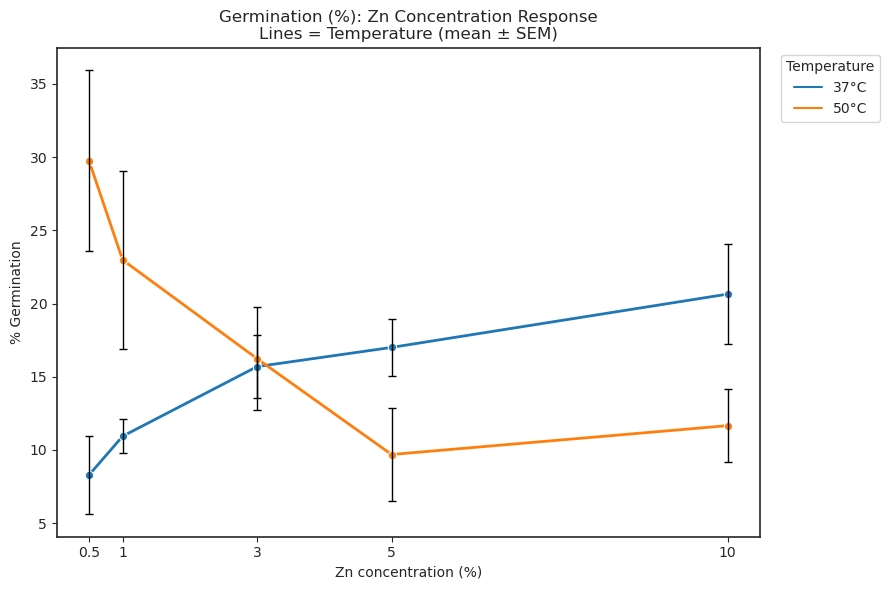

In [5]:
# ==== GERMINATION: x = Zn concentration, lines = Temperature (mean ± SEM) ====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/10_31_2025_percent_germination_all_temp_rerun-without_45C_and_Fe-bioreps.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True, purpose=""):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find a column for {purpose or candidates}. "
                       f"Available columns: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def parse_condition(cond):
    """
    Parse '0.5% Zn' -> (0.5, 'Zn'); '5% Fe' -> (5.0, 'Fe'); returns (nan,'') if not found.
    """
    s = str(cond)
    metal = "Fe" if "Fe" in s else ("Zn" if "Zn" in s else "")
    m = re.search(r"([\d.]+)\s*%", s)
    conc = float(m.group(1)) if m else np.nan
    return conc, metal

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns (case-insensitive) ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"], purpose="strain/condition label")
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"], purpose="temperature")
percent_col = find_col(
    df, ["percent_germinated","Percent_Germinated","%Germination","Germination","germination"],
    required=False, purpose="% germination"
)

# ---- Make numeric % germination ----
if percent_col is None:
    germ_col  = find_col(df, ["germinated","Germinated"], purpose="germinated count")
    total_col = find_col(df, ["total","Total","count","Count"], purpose="total count")
    df["_Value"] = (df[germ_col].astype(float) / df[total_col].replace(0, np.nan).astype(float)) * 100
else:
    df["_Value"] = pd.to_numeric(
        df[percent_col].astype(str).str.replace("%","", regex=False),
        errors="coerce"
    )

# ---- Clean/parse ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df[["_Conc","_Metal"]] = pd.DataFrame([parse_condition(s) for s in df[strain_col]])
df = df.dropna(subset=["_Value","_TempNum","_Conc"])

# Keep only Zn series (your request)
df = df[df["_Metal"] == "Zn"]

# Optional: restrict to 37 and 50 if anything else slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ---- Aggregate mean & SEM by (Conc, Temp) ----
summary = (
    df.groupby(["_Conc","_TempNum"])["_Value"]
      .agg(mean="mean", sem="sem", n="count")
      .reset_index()
)

# Pretty temperature labels
summary["TempLabel"] = summary["_TempNum"].apply(lambda t: f"{int(t)}°C" if float(t).is_integer() else f"{t:.1f}°C")

# Concentration order on x-axis
conc_order = sorted(summary["_Conc"].unique())
summary["_Conc"] = pd.Categorical(summary["_Conc"], categories=conc_order, ordered=True)

# ---- Plot: x = Zn concentration, lines = temperature, error bars = SEM ----
sns.set_style("ticks")          # clean, no grid background
plt.rcParams['axes.grid'] = False

plt.figure(figsize=(9, 6))
ax = sns.lineplot(
    data=summary.sort_values(["_TempNum","_Conc"]),
    x="_Conc", y="mean",
    hue="TempLabel", marker="o", linewidth=2
)

# Remove any gridlines
ax.grid(False)

# Manual SEM error bars
for _, r in summary.iterrows():
    ax.errorbar(r["_Conc"], r["mean"], yerr=r["sem"], fmt="none",
                ecolor="black", capsize=3, linewidth=1)

ax.set_title("Germination (%): Zn Concentration Response\nLines = Temperature (mean ± SEM)")
ax.set_xlabel("Zn concentration (%)")
ax.set_ylabel("% Germination")
ax.legend(title="Temperature", bbox_to_anchor=(1.02, 1), loc="upper left")

# Restore full border around plot
for spine in ["top", "right", "bottom", "left"]:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_linewidth(1.2)

# Tick labels
xticks = sorted(summary["_Conc"].cat.categories.astype(float))
ax.set_xticks(xticks)
ax.set_xticklabels([f"{int(x)}" if float(x).is_integer() else f"{x:g}" for x in xticks])

plt.tight_layout()
plt.show()


### to compute the fold-change table and the side mini-heatmap

/tmp/ipykernel_783460/509108708.py:157: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


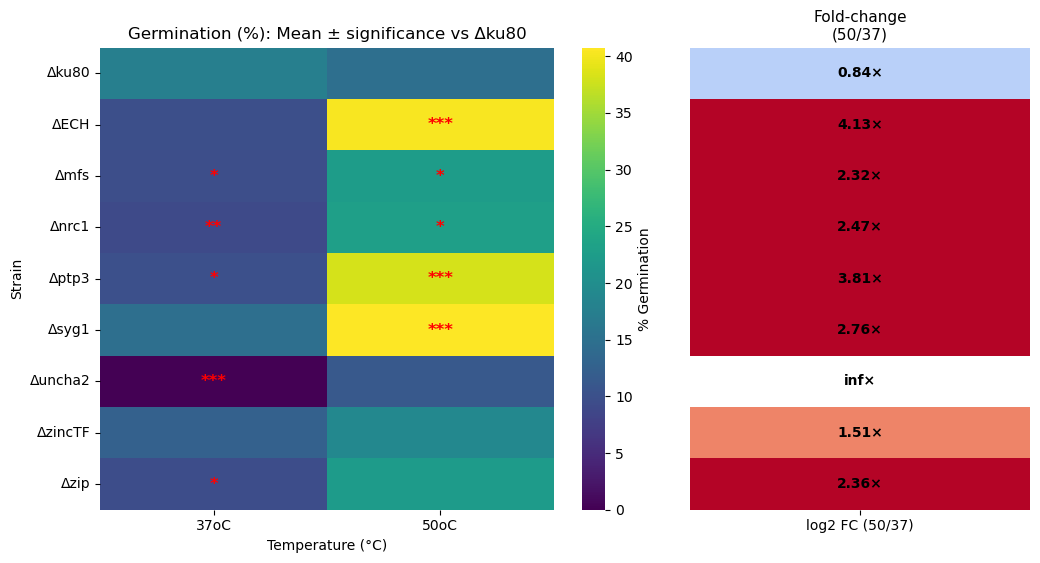


=== Fold Change (50°C / 37°C) by strain ===
         FC_50vs37  log2FC_50vs37
Δku80        0.843         -0.247
ΔECH         4.127          2.045
Δmfs         2.323          1.216
Δnrc1        2.474          1.307
Δptp3        3.809          1.929
Δsyg1        2.760          1.465
Δuncha2        inf            inf
ΔzincTF      1.513          0.597
Δzip         2.359          1.238

Saved fold-change table to: /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/fold_change_50_vs_37_by_strain.csv


In [1]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
from matplotlib.gridspec import GridSpec

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"

# ---- Helpers ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(
    df[value_col].astype(str).str.replace("%","",regex=False),
    errors="coerce"
)
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# ---- t-tests: each strain vs ku80 at each temperature ----
results = []
for temp, g in df.groupby("_TempNum"):
    # control strain: ku80 (case-insensitive)
    control = g.loc[g[strain_col].astype(str).str.lower()=="ku80","_Value"].dropna()
    for strain, sub in g.groupby(strain_col):
        if str(strain).lower()=="ku80":
            continue
        test = sub["_Value"].dropna()
        if len(control)>1 and len(test)>1:
            stat, p = stats.ttest_ind(test, control, equal_var=False)
            results.append({"strain": strain, "temp": temp, "pval": p})
        else:
            results.append({"strain": strain, "temp": temp, "pval": np.nan})

stats_df = pd.DataFrame(results)
stats_df["sig"] = stats_df["pval"].apply(
    lambda p: "***" if pd.notna(p) and p<0.001 else
              "**"  if pd.notna(p) and p<0.01  else
              "*"   if pd.notna(p) and p<0.05  else ""
)

# ---- Mean matrix for heatmap ----
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")
# Put ku80 first
ordered_index = ["ku80"] + [s for s in heat.index if str(s).lower()!="ku80"]
heat = heat.reindex(ordered_index)
# Add Δ prefix to display names
heat.index = [f"Δ{s}" for s in heat.index]

# ---- Fold-change (50/37) per strain ----
mean_table = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")

available_temps = list(mean_table.columns)
if 37.0 not in available_temps or 50.0 not in available_temps:
    print("Warning: 37°C or 50°C not found in dataset. Available:", available_temps)

fc_tbl = pd.DataFrame(index=mean_table.index)
fc_tbl["FC_50vs37"] = mean_table.get(50.0) / mean_table.get(37.0)
fc_tbl["log2FC_50vs37"] = np.log2(fc_tbl["FC_50vs37"])

# Match row order of the left heatmap (remove Δ to match original names)
row_order_raw = [idx.replace("Δ", "") for idx in heat.index]
fc_tbl = fc_tbl.reindex(row_order_raw)

# Mini-heatmap matrix (use log2FC as color); add Δ back for display
fc_color_mat = fc_tbl[["log2FC_50vs37"]].copy()
fc_color_mat.index = heat.index  # Δ-prefixed labels
fc_color_mat.columns = ["log2 FC (50/37)"]

# ---- Plot: 2 panels (left: temps; right: log2FC mini-heatmap with FC text) ----
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 2, width_ratios=[heat.shape[1], 1.2], wspace=0.05, figure=fig)

# Left panel: main heatmap
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    heat, cmap="viridis", annot=False, cbar_kws={"label": "% Germination"}, ax=ax0
)
ax0.set_title("Germination (%): Mean ± significance vs Δku80")
ax0.set_xlabel("Temperature (°C)")
ax0.set_ylabel("Strain")

# Significance stars
for _, row in stats_df.iterrows():
    strain = row["strain"]
    if str(strain).lower() == "ku80":
        continue
    sig = row["sig"]
    if not sig:
        continue
    disp_name = f"Δ{strain}"
    if disp_name in heat.index and row["temp"] in heat.columns:
        y = list(heat.index).index(disp_name)
        x = list(heat.columns).index(row["temp"])
        ax0.text(
            x + 0.5, y + 0.5, sig,
            color="red", ha="center", va="center",
            fontsize=12, fontweight="bold"
        )

# Use user's preferred temperature formatting: 37oC, 50oC (no space)
xt = [f"{int(t)}oC" if float(t).is_integer() else f"{t:.1f}oC" for t in heat.columns]
ax0.set_xticklabels(xt, rotation=0)

# Right panel: mini-heatmap
ax1 = fig.add_subplot(gs[0, 1])

# symmetric limits around 0 for log2FC
absmax = np.nanmax(np.abs(fc_color_mat.values))
if not np.isfinite(absmax) or absmax == 0:
    absmax = 1.0  # fallback to avoid vmin==vmax
sns.heatmap(
    fc_color_mat, cmap="coolwarm", center=0, annot=False, cbar=False,
    yticklabels=False, xticklabels=True, ax=ax1,
    vmin=-absmax, vmax=absmax
)
ax1.set_xlabel("")  # small header above
ax1.set_ylabel("")
ax1.set_title("Fold-change\n(50/37)", fontsize=11)

# Numeric FC inside each cell (e.g., "1.87×"; NA if missing)
for i, idx in enumerate(fc_color_mat.index):
    base_name = idx.replace("Δ", "")
    fc_val = fc_tbl.loc[base_name, "FC_50vs37"] if base_name in fc_tbl.index else np.nan
    txt = "NA" if pd.isna(fc_val) else f"{fc_val:.2f}×"
    ax1.text(
        0.5, i + 0.5, txt,
        ha="center", va="center", fontsize=10, fontweight="bold"
    )

# Ensure vertical alignment of panels
ax1.set_ylim(ax0.get_ylim())

plt.tight_layout()
plt.show()

# ---- Print tidy fold-change table ----
fc_out = fc_tbl.copy()
fc_out.index = [f"Δ{s}" for s in fc_out.index]
print("\n=== Fold Change (50°C / 37°C) by strain ===")
print(fc_out[["FC_50vs37", "log2FC_50vs37"]].round(3))

# ---- Optional: save FC table to CSV next to input ----
try:
    out_path = FILE.rsplit("/", 1)[0] + "/fold_change_50_vs_37_by_strain.csv"
    fc_out.to_csv(out_path)
    print(f"\nSaved fold-change table to: {out_path}")
except Exception as e:
    print("\nCould not save fold-change table:", e)



===== TWO-WAY ANOVA (Type II) =====
                   sum_sq     df           F        PR(>F)
Strain        6914.324226    8.0    8.061742  1.585782e-09
Temp         11813.536203    1.0  110.191743  3.828443e-21
Strain:Temp   6773.853360    8.0    7.897960  2.515884e-09
Residual     23478.750371  219.0         NaN           NaN
[Saved] ANOVA table -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/two_way_ANOVA_strain_temp_interaction.csv
[Saved] Model-based contrasts vs Δku80 -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/model_contrasts_vs_ku80_by_temp.csv


/tmp/ipykernel_729429/3365333522.py:83: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  X = dmatrix(model.model.data.design_info.builder, row, return_type="dataframe")
/tmp/ipykernel_729429/3365333522.py:83: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-winded way of writing 'design_info' (i.e. the .builder attribute just returns self)
  X = dmatrix(model.model.data.design_info.builder, row, return_type="dataframe")
/tmp/ipykernel_729429/3365333522.py:83: DeprecationWarning: The DesignInfo.builder attribute is deprecated starting in patsy v0.4.0; distinct builder objects have been eliminated and design_info.builder is now just a long-wi

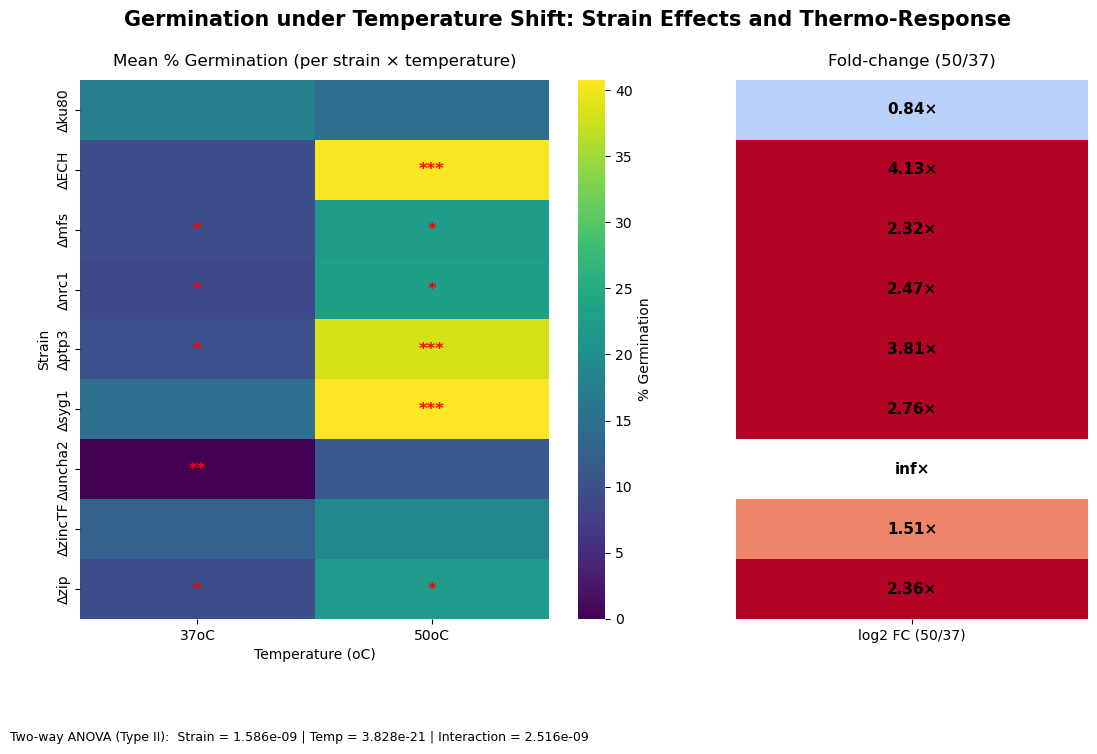

In [2]:
# === Germination heatmaps + Two-way ANOVA + model-based contrasts vs Δku80 ===
# Left panel: mean % germination with stars = model-based (per Temp) strain vs Δku80
# Right panel: log2FC (50/37) mini-heatmap with numeric FC text
# Saves: ANOVA table + contrasts table next to the input file

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from pathlib import Path

# statsmodels for ANOVA & contrasts
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrix
from statsmodels.stats.multitest import multipletests

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"
SAVE_ANOVA = True
SAVE_CONTRASTS = True
ALPHA = 0.05   # for BH/FDR stars

# ---- Helpers ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# Keep only 37 and 50 if others slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ======================= TWO-WAY ANOVA (Strain * Temp) =======================
df_anova = df.copy()
df_anova["Strain"] = df_anova[strain_col].astype("category")
df_anova["Temp"]   = df_anova["_TempNum"].astype("category")

# Make sure "ku80" exists (as control)
if not (df_anova["Strain"].astype(str).str.lower() == "ku80").any():
    raise ValueError("Control strain 'ku80' not found (case-insensitive).")

# Fit the model with interaction
model = ols("_Value ~ Strain * Temp", data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n===== TWO-WAY ANOVA (Type II) =====")
print(anova_table)

if SAVE_ANOVA:
    out_anova = Path(FILE).with_name("two_way_ANOVA_strain_temp_interaction.csv")
    anova_table.to_csv(out_anova)
    print(f"[Saved] ANOVA table -> {out_anova}")

# -------- Helpers for model-based marginal means/contrasts ----------
# Build a design row matching model's encoding for a given Strain & Temp
def design_row(strain, temp_as_cat):
    row = pd.DataFrame({"Strain":[strain], "Temp":[temp_as_cat]})
    row["Strain"] = pd.Categorical(row["Strain"], categories=df_anova["Strain"].cat.categories)
    row["Temp"]   = pd.Categorical(row["Temp"],   categories=df_anova["Temp"].cat.categories)
    X = dmatrix(model.model.data.design_info.builder, row, return_type="dataframe")
    return X.reindex(columns=model.params.index, fill_value=0.0).to_numpy()[0]

# ================== Model-based contrasts: Strain vs Δku80 at each Temp ==================
cat_strains = df_anova["Strain"].cat.categories
cat_temps   = df_anova["Temp"].cat.categories

# Find the canonical label for ku80 in categories (case-insensitive)
ku80_label = [s for s in cat_strains if str(s).lower() == "ku80"]
if len(ku80_label) != 1:
    raise ValueError("Ambiguous or missing 'ku80' level in Strain categories.")
ku80_label = ku80_label[0]

contrast_rows = []
for t in cat_temps:
    # skip temps that don't have observations
    if df_anova.loc[df_anova["Temp"]==t, "_Value"].empty:
        continue
    x_ku = design_row(ku80_label, t)
    for s in cat_strains:
        if s == ku80_label:
            continue
        # Contrast: mean(s, t) - mean(ku80, t)
        x_s  = design_row(s, t)
        L = (x_s - x_ku).reshape(1, -1)
        ttest = model.t_test(L)
        est = float(np.dot(L, model.params))  # mean difference at Temp=t
        se  = float(np.sqrt(np.dot(L, np.dot(model.cov_params(), L.T))))
        contrast_rows.append({
            "temp": float(t), "strain": str(s),
            "estimate": est, "se": se,
            "t": float(ttest.tvalue[0][0]),
            "pval_raw": float(ttest.pvalue),
            "ref": str(ku80_label)
        })

contrasts_df = pd.DataFrame(contrast_rows)

# BH/FDR across ALL tests
rej, p_adj, _, _ = multipletests(contrasts_df["pval_raw"].values, alpha=ALPHA, method="fdr_bh")
contrasts_df["pval_adj"] = p_adj
def stars(p):
    return "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 0.05 else ""
contrasts_df["sig"] = contrasts_df["pval_adj"].apply(stars)

# Save the contrasts
if SAVE_CONTRASTS:
    out_contr = Path(FILE).with_name("model_contrasts_vs_ku80_by_temp.csv")
    contrasts_df.to_csv(out_contr, index=False)
    print(f"[Saved] Model-based contrasts vs Δku80 -> {out_contr}")

# ===================== Heatmap data for left panel (means) ====================
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")

# Put ku80 first
ordered_index = ["ku80"] + [s for s in heat.index if str(s).lower()!="ku80"]
heat = heat.reindex(ordered_index)

# Add Δ prefix to display names
heat.index = [f"Δ{s}" for s in heat.index]

# ===================== Fold-change (50/37) for right panel ====================
mean_table = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")
available_temps = list(mean_table.columns)
if 37.0 not in available_temps or 50.0 not in available_temps:
    print("Warning: 37°C or 50°C not found in dataset. Available:", available_temps)

fc_tbl = pd.DataFrame(index=mean_table.index)
fc_tbl["FC_50vs37"] = mean_table.get(50.0) / mean_table.get(37.0)
fc_tbl["log2FC_50vs37"] = np.log2(fc_tbl["FC_50vs37"])

# Match row order of the left heatmap (remove Δ to match original names)
row_order_raw = [idx.replace("Δ", "") for idx in heat.index]
fc_tbl = fc_tbl.reindex(row_order_raw)

# Mini-heatmap color matrix; add Δ back for display
fc_color_mat = fc_tbl[["log2FC_50vs37"]].copy()
fc_color_mat.index = heat.index  # Δ-prefixed labels
fc_color_mat.columns = ["log2 FC (50/37)"]

# ================================ Plot =======================================
fig = plt.figure(figsize=(13, 7))
gs = GridSpec(1, 2, width_ratios=[heat.shape[1], 1.2], wspace=0.15, figure=fig)

# ---- Add a clean overall title (suptitle) ----
fig.suptitle("Germination under Temperature Shift: Strain Effects and Thermo-Response",
             fontsize=15, fontweight="bold", y=0.98)

# Left panel: mean germination heatmap
ax0 = fig.add_subplot(gs[0, 0])
h0 = sns.heatmap(
    heat, cmap="viridis", annot=False,
    cbar_kws={"label": "% Germination"},
    ax=ax0
)
ax0.set_title("Mean % Germination (per strain × temperature)",
              fontsize=12, pad=10)
ax0.set_xlabel("Temperature (oC)")
ax0.set_ylabel("Strain")

# Model-based significance stars (vs Δku80)
for _, row in contrasts_df.iterrows():
    if not row["sig"]:
        continue
    disp_strain = f"Δ{row['strain']}"
    if disp_strain in heat.index and row["temp"] in heat.columns:
        y = list(heat.index).index(disp_strain)
        x = list(heat.columns).index(row["temp"])
        ax0.text(
            x + 0.5, y + 0.5, row["sig"],
            color="red", ha="center", va="center",
            fontsize=12, fontweight="bold"
        )

# Temperature labels formatted without spaces
ax0.set_xticklabels([f"{int(t)}oC" for t in heat.columns], rotation=0)

# ---- ANOVA text moved *below left panel*, away from title ----
# Extract p-values
p_strain = anova_table.loc["Strain", "PR(>F)"]
p_temp   = anova_table.loc["Temp",   "PR(>F)"]
p_inter  = anova_table.loc["Strain:Temp", "PR(>F)"]

ax0.text(
    -0.15, -0.22, 
    f"Two-way ANOVA (Type II):  Strain = {p_strain:.3e} | Temp = {p_temp:.3e} | Interaction = {p_inter:.3e}",
    transform=ax0.transAxes,
    ha="left", va="center",
    fontsize=9
)

# Right panel: log2 fold-change heatmap
ax1 = fig.add_subplot(gs[0, 1])
absmax = np.nanmax(np.abs(fc_color_mat.values))
absmax = absmax if np.isfinite(absmax) and absmax>0 else 1.0

sns.heatmap(
    fc_color_mat, cmap="coolwarm", center=0, annot=False, cbar=False,
    yticklabels=False, xticklabels=True, ax=ax1,
    vmin=-absmax, vmax=absmax
)
ax1.set_title("Fold-change (50/37)", fontsize=12, pad=10)

# Numeric FC overlay
for i, idx in enumerate(fc_color_mat.index):
    base = idx.replace("Δ", "")
    fc = fc_tbl.loc[base, "FC_50vs37"]
    txt = "NA" if pd.isna(fc) else f"{fc:.2f}×"
    ax1.text(0.5, i + 0.5, txt, ha="center", va="center",
             fontsize=11, fontweight="bold")

ax1.set_ylim(ax0.get_ylim())
plt.tight_layout(rect=[0, 0.08, 1, 0.96])  # Leave room for suptitle + ANOVA text
plt.show()



===== TWO-WAY ANOVA (Type II) =====
                   sum_sq     df           F        PR(>F)
Strain        6914.324226    8.0    8.061742  1.585782e-09
Temp         11813.536203    1.0  110.191743  3.828443e-21
Strain:Temp   6773.853360    8.0    7.897960  2.515884e-09
Residual     23478.750371  219.0         NaN           NaN
[Saved] ANOVA table -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/two_way_ANOVA_strain_temp_interaction.csv
[Saved] Pairwise vs Δku80 by temp -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/pairwise_vs_ku80_by_temp.csv


/tmp/ipykernel_729429/3686780532.py:202: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.08, 1, 0.96])  # breathing room for suptitle and ANOVA line


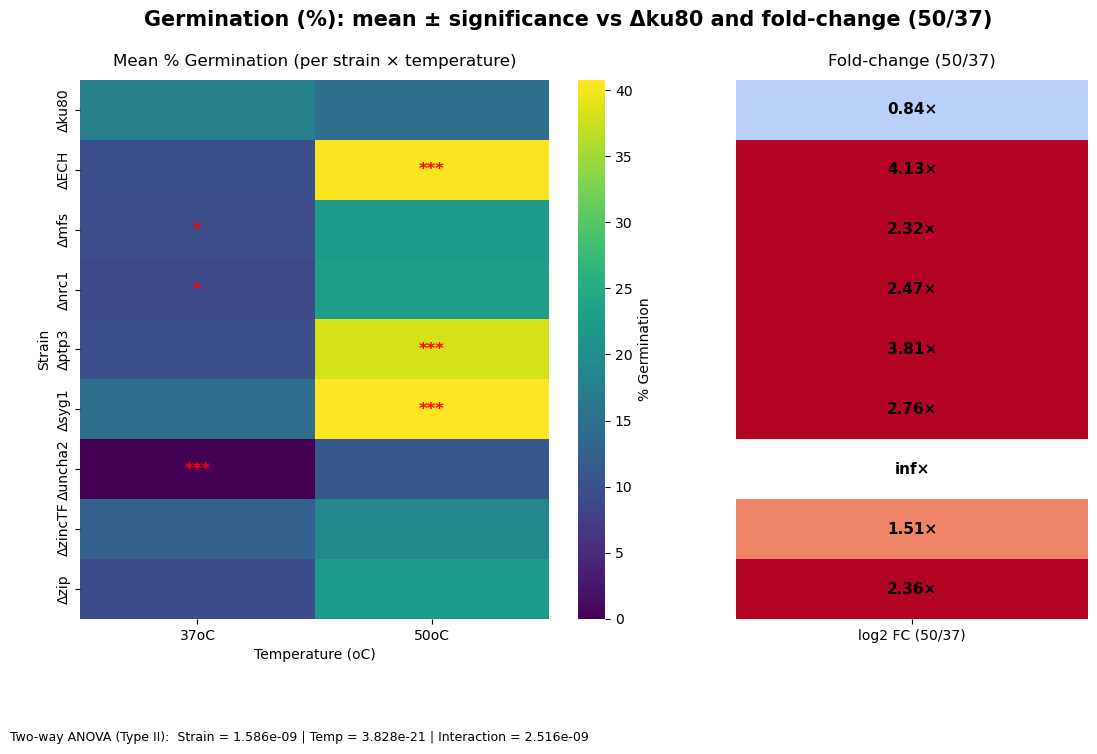


Saved fold-change table -> /usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/fold_change_50_vs_37_by_strain.csv


In [3]:
# === Germination heatmaps + Two-way ANOVA + per-temp Δku80 comparisons =======
# Left: mean % germination with red stars for strain vs Δku80 at each temp
# Right: log2FC (50/37) mini-heatmap with numeric FC text

# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from pathlib import Path

from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multitest import multipletests

# ---- Config ----
FILE = "/usr2/people/shollyt22/shollyt22/TnSeq_BarSeq_sequencings/plate_germination_assays_revised/percent_germination_all_gene_temp_replicates_rep2_without_45C.csv"
SAVE_ANOVA = True
SAVE_PAIRWISE = True
SAVE_FC = True
APPLY_FDR = True          # BH/FDR across all per-temp comparisons vs Δku80
STAR_COLOR = "red"        # annotation color
FIGSIZE = (13, 7)

# ---- Helpers ----
def find_col(df, candidates, required=True):
    lower_map = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in lower_map:
            return lower_map[cand.lower()]
    if required:
        raise KeyError(f"Could not find any of: {candidates}\nAvailable: {list(df.columns)}")
    return None

def to_num_temp(x):
    m = re.search(r"-?\d+\.?\d*", str(x))
    return float(m.group()) if m else np.nan

def p_to_stars(p):
    if pd.isna(p): return ""
    return "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 0.05 else ""

# ---- Load ----
df = pd.read_csv(FILE)

# ---- Identify columns ----
strain_col = find_col(df, ["Strain","Mutant","Genotype"])
temp_col   = find_col(df, ["Temperature","Temp","Temp_C"])
value_col  = find_col(df, ["percent_germinated","%Germination","Germination"])

# ---- Clean ----
df["_TempNum"] = df[temp_col].apply(to_num_temp)
df["_Value"] = pd.to_numeric(df[value_col].astype(str).str.replace("%","",regex=False), errors="coerce")
df = df.dropna(subset=[strain_col,"_TempNum","_Value"])

# Keep only 37 and 50 if others slipped in
df = df[df["_TempNum"].isin([37, 50])]

# ======================= TWO-WAY ANOVA (Strain * Temp) =======================
df_anova = df.copy()
df_anova["Strain"] = df_anova[strain_col].astype("category")
df_anova["Temp"]   = df_anova["_TempNum"].astype("category")

# sanity: require ku80 present
if not (df_anova["Strain"].astype(str).str.lower() == "ku80").any():
    raise ValueError("Control strain 'ku80' not found (case-insensitive).")

model = ols("_Value ~ Strain * Temp", data=df_anova).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\n===== TWO-WAY ANOVA (Type II) =====")
print(anova_table)

if SAVE_ANOVA:
    out_anova = Path(FILE).with_name("two_way_ANOVA_strain_temp_interaction.csv")
    anova_table.to_csv(out_anova)
    print(f"[Saved] ANOVA table -> {out_anova}")

# ================= Pairwise tests: each strain vs Δku80 per temperature =======
pairwise_rows = []
for temp, g in df.groupby("_TempNum"):
    ctrl = g.loc[g[strain_col].astype(str).str.lower()=="ku80", "_Value"].dropna()
    for strain, sub in g.groupby(strain_col):
        if str(strain).lower() == "ku80":
            continue
        test = sub["_Value"].dropna()
        if len(ctrl) > 1 and len(test) > 1:
            t, p = stats.ttest_ind(test, ctrl, equal_var=False)
        else:
            p = np.nan
        pairwise_rows.append({"strain": str(strain), "temp": float(temp), "pval_raw": p})

pairwise_df = pd.DataFrame(pairwise_rows)
if APPLY_FDR:
    mask = pairwise_df["pval_raw"].notna()
    pairwise_df.loc[mask, "pval_adj"] = multipletests(pairwise_df.loc[mask, "pval_raw"], method="fdr_bh")[1]
    pcol = "pval_adj"
else:
    pcol = "pval_raw"

pairwise_df["sig"] = pairwise_df[pcol].apply(p_to_stars)

if SAVE_PAIRWISE:
    out_pair = Path(FILE).with_name("pairwise_vs_ku80_by_temp.csv")
    pairwise_df.to_csv(out_pair, index=False)
    print(f"[Saved] Pairwise vs Δku80 by temp -> {out_pair}")

# ===================== Heatmap data for left panel (means) ====================
heat = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")

# Put ku80 first
ordered_index = ["ku80"] + [s for s in heat.index if str(s).lower()!="ku80"]
heat = heat.reindex(ordered_index)

# Add Δ prefix for display
heat.index = [f"Δ{s}" for s in heat.index]

# ===================== Fold-change (50/37) for right panel ====================
mean_table = df.pivot_table(index=strain_col, columns="_TempNum", values="_Value", aggfunc="mean")
fc_tbl = pd.DataFrame(index=mean_table.index)
fc_tbl["FC_50vs37"] = mean_table.get(50.0) / mean_table.get(37.0)
fc_tbl["log2FC_50vs37"] = np.log2(fc_tbl["FC_50vs37"])

# Match left panel order (strip/add Δ)
row_order_raw = [idx.replace("Δ", "") for idx in heat.index]
fc_tbl = fc_tbl.reindex(row_order_raw)

fc_color_mat = fc_tbl[["log2FC_50vs37"]].copy()
fc_color_mat.index = heat.index
fc_color_mat.columns = ["log2 FC (50/37)"]

# ================================ Plot =======================================
fig = plt.figure(figsize=FIGSIZE)
gs = GridSpec(1, 2, width_ratios=[heat.shape[1], 1.2], wspace=0.15, figure=fig)

# Suptitle
fig.suptitle("Germination (%): mean ± significance vs Δku80 and fold-change (50/37)",
             fontsize=15, fontweight="bold", y=0.98)

# ---- Left panel: mean heatmap ----
ax0 = fig.add_subplot(gs[0, 0])
sns.heatmap(
    heat, cmap="viridis", annot=False, cbar_kws={"label": "% Germination"}, ax=ax0
)
ax0.set_title("Mean % Germination (per strain × temperature)", fontsize=12, pad=10)
ax0.set_xlabel("Temperature (oC)")
ax0.set_ylabel("Strain")

# Temperature tick labels without a space before 'oC'
ax0.set_xticklabels([f"{int(t)}oC" if float(t).is_integer() else f"{t:.1f}oC" for t in heat.columns], rotation=0)

# ---- Place red stars in the corresponding cells (per-temp vs Δku80) ----
for _, row in pairwise_df.iterrows():
    sig = row["sig"]
    if not sig:
        continue
    disp = f"Δ{row['strain']}"
    if (disp in heat.index) and (row["temp"] in heat.columns):
        y = list(heat.index).index(disp)
        x = list(heat.columns).index(row["temp"])
        ax0.text(
            x + 0.5, y + 0.5, sig,
            color=STAR_COLOR, ha="center", va="center",
            fontsize=12, fontweight="bold"
        )

# ---- ANOVA p-values placed below the left panel (not crowding the title) ----
try:
    p_strain = anova_table.loc("Strain")["PR(>F)"]  # robust to MultiIndex fallback
except Exception:
    p_strain = anova_table.loc["Strain", "PR(>F)"] if "Strain" in anova_table.index else np.nan
p_temp   = anova_table.loc["Temp", "PR(>F)"] if "Temp" in anova_table.index else np.nan
p_inter  = anova_table.loc["Strain:Temp", "PR(>F)"] if "Strain:Temp" in anova_table.index else np.nan

ax0.text(
    -0.15, -0.22,
    f"Two-way ANOVA (Type II):  Strain = {p_strain:.3e} | Temp = {p_temp:.3e} | Interaction = {p_inter:.3e}",
    transform=ax0.transAxes, ha="left", va="center", fontsize=9
)

# ---- Right panel: mini-heatmap with log2FC and numeric FC text ----
ax1 = fig.add_subplot(gs[0, 1])
absmax = np.nanmax(np.abs(fc_color_mat.values))
if not np.isfinite(absmax) or absmax == 0:
    absmax = 1.0

sns.heatmap(
    fc_color_mat, cmap="coolwarm", center=0, annot=False, cbar=False,
    yticklabels=False, xticklabels=True, ax=ax1, vmin=-absmax, vmax=absmax
)
ax1.set_title("Fold-change (50/37)", fontsize=12, pad=10)
for i, idx in enumerate(fc_color_mat.index):
    base = idx.replace("Δ", "")
    fc = fc_tbl.loc[base, "FC_50vs37"]
    txt = "NA" if pd.isna(fc) else f"{fc:.2f}×"
    ax1.text(0.5, i + 0.5, txt, ha="center", va="center", fontsize=11, fontweight="bold")

ax1.set_ylim(ax0.get_ylim())

plt.tight_layout(rect=[0, 0.08, 1, 0.96])  # breathing room for suptitle and ANOVA line
plt.show()

# ---- Save fold-change table (tidy) ----
if SAVE_FC:
    fc_out = fc_tbl.copy()
    fc_out.index = [f"Δ{s}" for s in fc_out.index]
    out_fc = Path(FILE).with_name("fold_change_50_vs_37_by_strain.csv")
    fc_out.to_csv(out_fc)
    print(f"\nSaved fold-change table -> {out_fc}")
